***every things written by : Abdullah Al-Jarrah***

## To extract data which i need i just builded the following function

- 1- extract_title : and this is use for extract the whole content from text file
- 2- extract_Number : this is use for extract the class number from ( content ) we already found
- 3- DUTIES : extract the DUTIES from ( content )
- 4- requirement : extract the job requirements for me it's one of the most important feature we must find
- 5- salary : extract all possible salary for these job
- 6- driver_license : find if this job require driver license
- 7- open_date : find the start date to apply for this job
- 8- APPLICATION_DEADLINE : find the last date to apply for this job
- 9- education_major : as the name said (major)
- 10- EDUCATION_YEARS : how many years need to be studied in your education
- 11- SCHOOL_TYPE : college , universty ....
- 12- exam_type : 
- 13- course_count : how many course need to apply
- 14- course_length : course lenghth
- 15- course_subject : the courses subject need to applay
- 16- EXP_JOB: the title of the job you must have experience in
- 17- EXPERIENCE_LENGTH : The number of experience years needed to apply
- 18- FULL_TIME_PART_TIME : If the job is full time or part time

## Note from me

1. if you want to learn how to make Markdown just visit : https://www.youtube.com/watch?v=uVLzL5E-YBM&t=291s
2. website that help me the regular regression(re) : https://regex101.com/
3. if you want to learn the basics of (re) in Arabic please visit:
    1. https://www.youtube.com/watch?v=QrYB2S1IZKo
    2. https://www.youtube.com/watch?v=3B8qYBBml68
    3. https://www.youtube.com/watch?v=MnIPbqYoOaI
    4. https://www.youtube.com/watch?v=bxssGTLjktA
    5. https://www.youtube.com/watch?v=CD8HsbCG-T8&t=94s
    6. https://www.youtube.com/watch?v=UKA-3O7XwPs&t=135s
    7. https://www.youtube.com/watch?v=ZGizsqwe4ps&t=245s
    8. https://www.youtube.com/watch?v=MLb7pPOEJlg



# <span style="color:orange">Task 1 start

In [3]:
import os
import re
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from word2number import w2n

In [568]:

#creationg list of job_titles.csv file 
job_titles = pd.read_csv('job_titles .csv',header=None,names=["job_title"])
job_titles = job_titles['job_title'].tolist()

#read kaggle_data_dictionary - output_fields
file_data_dic = 'kaggle_data_dictionary - output_fields.csv'
data_dictionary = pd.read_csv(file_data_dic)

#read Job Bulletins using os to access all text file 
diriction_job_bulletins = 'Job Bulletins' # i just put the data in the same place of my work so i just use file name
data_list = []
for filename in os.listdir(diriction_job_bulletins):#os.listdir() method in Python gets the files and directories present in a given path.
    with open(os.path.join(diriction_job_bulletins, filename), 'r', errors='ignore') as f:
  
        data_list.append([filename, ''.join(f.readlines())])
jobs = pd.DataFrame(data_list, columns=["FileName", "Content"])
# jobs now have tow colomns FileName and Content(all data in the text file)

#extract jobs title
def extract_title(text):
    text = text.replace("CAMPUS INTERVIEWS ONLY", "")
    return text.strip().split("\n")[0].split("\t")[0]

jobs["Job_Class_Title"] = jobs["Content"].apply(lambda x: extract_title(x))

#extract jobs number
def extract_Number(text):
    s = re.search(r"(Class\s?\s?Code:\s{1,})(\d{1,})",text)
    if s :
        return s.group().split()[-1]       
    else:
        return None

jobs["Job_Class_Number"] = jobs["Content"].apply(lambda x: extract_Number(x))

#extract Dutied
def DUTIES(text):
    pattern =r"(DUTIES\D{,})(\d{,})\D{,}(\d{,})\D{,}(\d{,})\D{,}"
    s1 = re.search(pattern,text)
    if s1 :
        l = []
        for i in s1.group().split("\n"):
            if "REQUIREMENTS" not in i:
                l.append(i)
        
        return " ".join(l)    
    else:
        return None
    
jobs["DUTIES"] = jobs["Content"].apply(lambda x: DUTIES(x))

#extract the requirement
def requirement(t):
    requirment_start_tag = ['REQUIREMENTS', 'REQUIREMENT',"REQUIREMENTS","REQUIREMENTS/MINIMUM QUALIFICATIONS","REQUIREMENTS/ MINIMUM QUALIFICATIONS",'REQUIREMENTS/MINIMUM QUALIFICATION', 'REQUIREMENTS/ MINIMUM QUALIFICATION', 'REQUIREMENT/MINUMUM QUALIFICATIONS', 
             'REQUIREMENT/ MINIMUM QUALIFICATIONS', 'REQUIREMENT/ MINIMUM QUALIFICATION','REQUIREMENT/MINIMUM QUALIFICATION',]
    
    requirment_end_tag= ["PROCESS NOTE","PROCESS NOTES","PROCESS NOTE ","PROCESS NOTES ","PROCESS NOTE  ","NOTES:","NOTE:","NOTE","NOTES"]
    for i in requirment_start_tag:
        s=t.find(i)
        if s>0:
            break
    for j in requirment_end_tag:
        e = t.find(j,s)
        if e>0:
            break
    if s and e:
        return(t[s:e])
    return "noRequiemen"
    
jobs["requirement_set_text"]=jobs['Content'].apply(lambda x :  requirement(x))   

#extact salary (need some editint)
def salary(text):
    pattern= r"[$]\d{1,},\d{1,}\sto\s[$]\d{1,4},\d{1,4}"
    s2 = re.findall(pattern,text)
    if s2 :
        return s2     
    else:
        return None
    
jobs["salary"] = jobs["Content"].apply(lambda x: salary(x))

#if driver_license required of no 
def driver_license(text):
    p = r"may(.*?)valid\s(.*?)\sdriver's license"
    s=re.search(p,text)
    if s:
        return "T"
    else:
        return "F"

jobs["DRIVER_LICENSE_REQ"] = jobs["Content"].apply(lambda x: driver_license(x))    

#find open data
def open_date(text):
    s3=re.search(r'(\d\d-\d\d-\d\d)',text)
    if s3:
        return s3.group()
    else:
        return None

jobs["open_date"] = jobs["Content"].apply(lambda x: open_date(x)) 

#find deadline date to application
def APPLICATION_DEADLINE(text):
    p1=r'APPLICATION DEADLINE(\n*)?(.*)?.?(\n*)?(.*)?.?'
    pattern = r"(JANUARY|FEBRUARY|MARCH|APRIL|MAY|JUNE|JULY|AUGUST|SEPTEMBER|OCTOBER|NOVEMBER|DECEMBER)\s(\d{1,2},\s\d{4})"
    s6=re.findall(p1,text)
    s6=re.findall(pattern,str(s6))
    if s6:
        return " ".join(s6[-1])
    else:
        return None
    
jobs["APPLICATION_DEADLINE"]=jobs['Content'].apply(lambda x :  APPLICATION_DEADLINE(x))

#get education major
def education_major(text):
    pattern=r"(?:major|concentration)\s*in\s*([\s\S]*)(?:[;]+|or a closely related field)"
    match = re.search(pattern, text)
    if match is not None:
        majors_text = match.group(1).strip()
        #solve what we found by removing addition symbol
        majors_text = re.sub(r'\([^)]*\)', '', majors_text) 
        
        #split the data we found and more majers
        majors_split = re.split(';|,|\sor\s|\sand\s', majors_text)
        majors = [item.strip().lower() for item in majors_split]
        majors = list(filter(None, majors))
        return "|".join(majors)
    return None

jobs["EDUCATION_MAJOR"]=jobs["requirement_set_text"].apply(lambda x:education_major(x))


#extract the education years
def EDUCATION_YEARS(text):
    pattern = r'(One|Two|Three|Four|Five|Six|Seven|Eight|Nine|Ten|one|two|three|four)(\s|-)(years?)\scollege'
    s5 = re.findall(pattern,text)
    if s5:
        return s5[0][0]
    else:
        return None
    
jobs['EDUCATION_YEARS']=jobs['Content'].apply(lambda x :  EDUCATION_YEARS(x))#have only two value array([nan, 'four'], dtype=object)

#extract school type (not sure)
def SCHOOL_TYPE(text):
    pattern=r"College or University|College|University|college or university|college|APPRENTICESHIP|university|High School|high school|special degree program|degree program|undergraduate|Undergraduate|Graduate|graduate|Bachelor’s Degree|Bachelor|Master|Master’s Degree|Doctoral or Professional Degree"
    s=re.search(pattern,text)
    if s:
        return s.group()
    return None

jobs['SCHOOL_TYPE']=jobs['requirement_set_text'].apply(lambda x : SCHOOL_TYPE(x))

def SCHOOL_TYPE1(text):
    pattern=r",?(.*?)chool.?,"
    s=re.search(pattern,text)
    if s:
        return s.group()
    return None

jobs['SCHOOL_TYPE1']=jobs['requirement_set_text'].apply(lambda x : SCHOOL_TYPE1(x))

#exma_type
def exam_type(text):
    pattern=r'(?s)Open\s*Date(.*?)ANNUAL\s*SALARY'
    match = re.search(pattern,text)
    if match:
        result = match.group(1)
        result=result.lower()
        if "open" in result:
            return "Open"
        return "Close"  
    else:
        return "Close"
    
jobs["Exam_type"]=jobs["Content"].apply(lambda x :exam_type(x))

#get course count
def course_count( requirements):
    coursecountpattern=r'(.*)completion of(.*)(course?)(.*)'
    CourseCount = 0
    if None != re.search( coursecountpattern, requirements ) :
        try :
            CourseCount = re.search( coursecountpattern, requirements ).group( 2 )        
            CourseCount = CourseCount.split( 'course' )
            CourseCount = CourseCount[0]

            if 0 < len(CourseCount.strip().split( ' ' )) :
                for strLine in CourseCount.split( ' ' ) :
                    try :
                        CourseCount = w2n.word_to_num(strLine)
                        return CourseCount
                        break
                    except:
                        continue
                if str(CourseCount).isdigit() != True :
                    CourseCount = 0
            else :
                CourseCount = 0
                return CourseCount
                    
        except Exception as e :
            CourseCount = 0
            return CourseCount  

jobs["COURSE_COUNT"]=jobs["requirement_set_text"].apply(lambda x:course_count(x))
#jobs["COURSE_COUNT"]=jobs["COURSE_COUNT"].map
#get course length
def course_length(text):
    
    semester_pattern=r'([A-Za-z0-9]+)\ssemester[s]?'
    quarters_pattern=r'([A-Za-z0-9]+)\squarter[s]?'
    semester_match = re.search(semester_pattern, text)
    quarters_match = re.search(quarters_pattern, text)
    
    if semester_match is not None:
        semesters = semester_match.group(1).strip()
    else:
        semesters = None
    
    if quarters_match is not None:
        quarters = quarters_match.group(1).strip()
    else:
        quarters = None

    if semesters is not None and quarters is not None:
        return str(quarters) + "Q" + "|"+ str(semesters) + "S"
    elif semesters is not None:
        return str(semesters) + "S"
    elif quarters is not None:
        return str(quarters) + "Q"
    return None   

jobs["COURSE_LENGTH"]=jobs['requirement_set_text'].apply(lambda x : course_length(str(x)))

#get course subjects
def course_subject(text):
    pattern = r'course[s]?(?:.*?)(?:in |:)(.*)'
    match = re.search(pattern, text)
    if match is not None:
        subjects_text = match.group(1).strip()
        subjects_text = re.sub(r'\([^)]*\)', '', subjects_text) #remove information in brackets
        subjects_splitted = re.split("[,;]", subjects_text)
        subjects = [re.sub(r'[\.,;]', '', item) for item in subjects_splitted]
        subjects = [item.strip().lower() for item in subjects]
        subjects = [re.sub(r'^(or|and|either)\s', '', item) for item in subjects] #remove leading or/and
        subjects = [re.sub(r'\s(or|and)$', '', item) for item in subjects] #remove ending or/and   
        subjects = [re.sub(r'^\s*(or|and)\s*$', '', item) for item in subjects] #remove empty or/and  
        subjects = list(filter(None, subjects))
        return "|".join(subjects)
    return None
    
jobs["COURSE_SUBJECT(s)"]=jobs['requirement_set_text'].apply(lambda x : course_subject(str(x)))

#extract exp_jop 
def EXP_JOB(text):
    pattern =r"experience(.*)at?s?.?,?"
    s6 = re.search(pattern,text)
    if s6:
        return s6.group()
    else:
        return None

jobs['EXP_JOB_CLASS_TITLE']=jobs['requirement_set_text'].apply(lambda x : EXP_JOB(x))


#extract EXPERIENCE_LENGTH need edit they have more than one value
def EXPERIENCE_LENGTH(text):
    s4 = re.findall(r'(One|Two|Three|Four|Five|Six|Seven|Eight|Nine|Ten|one|two|three|four)\s(years?)\s(of\sfull(-|\s)time)',text)
    if s4:
        return s4
    else:
        return None
    
jobs["EXPERIENCE_LENGTH"]=jobs["requirement_set_text"].apply(lambda x: EXPERIENCE_LENGTH(x)) 


#FULL_TIME_PART_TIME: If the job is full time or part time or both. (need edit)
def FULL_TIME_PART_TIME(text):
    try:
        if len(text) :
            return 'FULL_TIME'
        else:
            return None 
    except TypeError:
        return None
    
jobs['FULL_TIME_PART_TIME']=jobs['EXPERIENCE_LENGTH'].apply(lambda x:  FULL_TIME_PART_TIME(x)) # i just check the data the experience have only full time or nan


jobs.head()

,FileName,Content,Job_Class_Title,Job_Class_Number,DUTIES,requirement_set_text,salary,DRIVER_LICENSE_REQ,open_date,APPLICATION_DEADLINE,...,EDUCATION_YEARS,SCHOOL_TYPE,SCHOOL_TYPE1,Exam_type,COURSE_COUNT,COURSE_LENGTH,COURSE_SUBJECT(s),EXP_JOB_CLASS_TITLE,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME
0,311 DIRECTOR 9206 041814.txt,311 DIRECTOR\nClass Code: 9206\nOpen Dat...,311 DIRECTOR,9206,DUTIES A 311 Director is responsible for the ...,REQUIREMENTS\n\n1. One year of full-time paid ...,"[$125,175 to $155,514]",F,04-18-14,"MAY 1, 2014",...,None,Bachelor,None,Close,NaN,None,None,experience as a Senior Management Analyst with...,"[(One, year, of full-time, -), (four, years, o...",FULL_TIME
1,ACCOUNTANT 1513 062218.txt,ACCOUNTANT\n\nClass Code: 1513\nOpen Dat...,ACCOUNTANT,1513,DUTIES An Accountant does professional accoun...,REQUIREMENT/MINIMUM QUALIFICATION\n\nGraduatio...,"[$49,903 to $72,996, $55,019 to $80,472]",T,06-22-18,None,...,four,college or university,None,Open,NaN,36Q|24S,None,None,None,None
2,ACCOUNTING CLERK 1223 071318.txt,ACCOUNTING CLERK\n\nClass Code: 1223\nOp...,ACCOUNTING CLERK,1223,DUTIES An Accounting Clerk performs difficult...,REQUIREMENT/MINIMUM QUALIFICATION\n\nTwo years...,"[$49,005 to $71,618]",F,07-13-18,None,...,None,college or university,Successful completion of 6 semester or 9 quart...,Open,NaN,9Q|6S,None,"experience, including one year of full-time pa...","[(Two, years, of full-time, -), (one, year, of...",FULL_TIME
3,ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt,ACCOUNTING RECORDS SUPERVISOR\n\nClass Code: ...,ACCOUNTING RECORDS SUPERVISOR,1119,DUTIES An Accounting Records Supervisor assig...,REQUIREMENT/MINIMUM QUALIFICATION\n\nTwo years...,"[$55,332 to $80,930, $65,145 to $95,254]",F,07-27-18,"AUGUST 9, 2018",...,None,None,None,Open,NaN,None,None,"experience as an Accounting Clerk, or in a cla...","[(Two, years, of full-time, -)]",FULL_TIME
4,ADMINISTRATIVE ANALYST 1590 060118.txt,ADMINISTRATIVE ANALYST\n\nClass Code: 15...,ADMINISTRATIVE ANALYST,1590,DUTIES An Administrative Analyst performs pro...,REQUIREMENTS/MINIMUM QUALIFICATIONS\n\n1. One ...,"[$60,489 to $88,468, $71,451 to $104,462]",T,06-01-18,"JUNE 14, 2018",...,four,college or university,None,Open,NaN,None,None,experience as a Management Assistant with the ...,"[(One, year, of full-time, -), (Two, years, of...",FULL_TIME


# <span style="color:orange">Task 1 end 

In [937]:
#jobs.to_csv("job.csv") # use if for save the data as csv file

# solve data form , data cleaning , data wrangling and data engineering

In [991]:
df = pd.read_csv("job.csv")
df = df.drop("Unnamed: 0",axis=1)
df.head()

,FileName,Content,Job_Class_Title,Job_Class_Number,DUTIES,requirement_set_text,salary,DRIVER_LICENSE_REQ,open_date,APPLICATION_DEADLINE,...,EDUCATION_YEARS,SCHOOL_TYPE,SCHOOL_TYPE1,Exam_type,COURSE_COUNT,COURSE_LENGTH,COURSE_SUBJECT(s),EXP_JOB_CLASS_TITLE,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME
0,311 DIRECTOR 9206 041814.txt,311 DIRECTOR\nClass Code: 9206\nOpen Dat...,311 DIRECTOR,9206.0,DUTIES A 311 Director is responsible for the ...,REQUIREMENTS\n\n1. One year of full-time paid ...,"['$125,175 to $155,514']",F,04-18-14,"MAY 1, 2014",...,NaN,Bachelor,NaN,Close,NaN,NaN,NaN,experience as a Senior Management Analyst with...,"[('One', 'year', 'of full-time', '-'), ('four'...",FULL_TIME
1,ACCOUNTANT 1513 062218.txt,ACCOUNTANT\n\nClass Code: 1513\nOpen Dat...,ACCOUNTANT,1513.0,DUTIES An Accountant does professional accoun...,REQUIREMENT/MINIMUM QUALIFICATION\n\nGraduatio...,"['$49,903 to $72,996', '$55,019 to $80,472']",T,06-22-18,NaN,...,four,college or university,NaN,Open,NaN,36Q|24S,NaN,NaN,NaN,NaN
2,ACCOUNTING CLERK 1223 071318.txt,ACCOUNTING CLERK\n\nClass Code: 1223\nOp...,ACCOUNTING CLERK,1223.0,DUTIES An Accounting Clerk performs difficult...,REQUIREMENT/MINIMUM QUALIFICATION\n\nTwo years...,"['$49,005 to $71,618']",F,07-13-18,NaN,...,NaN,college or university,Successful completion of 6 semester or 9 quart...,Open,NaN,9Q|6S,NaN,"experience, including one year of full-time pa...","[('Two', 'years', 'of full-time', '-'), ('one'...",FULL_TIME
3,ACCOUNTING RECORDS SUPERVISOR 1119 072718.txt,ACCOUNTING RECORDS SUPERVISOR\n\nClass Code: ...,ACCOUNTING RECORDS SUPERVISOR,1119.0,DUTIES An Accounting Records Supervisor assig...,REQUIREMENT/MINIMUM QUALIFICATION\n\nTwo years...,"['$55,332 to $80,930', '$65,145 to $95,254']",F,07-27-18,"AUGUST 9, 2018",...,NaN,NaN,NaN,Open,NaN,NaN,NaN,"experience as an Accounting Clerk, or in a cla...","[('Two', 'years', 'of full-time', '-')]",FULL_TIME
4,ADMINISTRATIVE ANALYST 1590 060118.txt,ADMINISTRATIVE ANALYST\n\nClass Code: 15...,ADMINISTRATIVE ANALYST,1590.0,DUTIES An Administrative Analyst performs pro...,REQUIREMENTS/MINIMUM QUALIFICATIONS\n\n1. One ...,"['$60,489 to $88,468', '$71,451 to $104,462']",T,06-01-18,"JUNE 14, 2018",...,four,college or university,NaN,Open,NaN,NaN,NaN,experience as a Management Assistant with the ...,"[('One', 'year', 'of full-time', '-'), ('Two',...",FULL_TIME


In [992]:
df.dtypes # as we see the data from text file stord as object se we must solve this issue after we solve it we will se the new type for each column

FileName                 object
Content                  object
Job_Class_Title          object
Job_Class_Number        float64
DUTIES                   object
requirement_set_text     object
salary                   object
DRIVER_LICENSE_REQ       object
open_date                object
APPLICATION_DEADLINE     object
EDUCATION_MAJOR          object
EDUCATION_YEARS          object
SCHOOL_TYPE              object
SCHOOL_TYPE1             object
Exam_type                object
COURSE_COUNT            float64
COURSE_LENGTH            object
COURSE_SUBJECT(s)        object
EXP_JOB_CLASS_TITLE      object
EXPERIENCE_LENGTH        object
FULL_TIME_PART_TIME      object
dtype: object

In [993]:
df["APPLICATION_DEADLINE"]= pd.to_datetime(df['APPLICATION_DEADLINE'])
df["open_date"] = pd.to_datetime(df["open_date"])

In [994]:
def s():
    y=df["APPLICATION_DEADLINE"].copy()
    z=df["open_date"]+np.timedelta64(1, 'M')
    l=df["APPLICATION_DEADLINE"].isnull()
    Solved_APPLICATION_DEADLINE=[]
    
    for i in range(len(l)):
        
        if l[i] == True:
            Solved_APPLICATION_DEADLINE.append(z[i])
            
        elif l[i]==False:
            Solved_APPLICATION_DEADLINE.append(y[i])
            
    return Solved_APPLICATION_DEADLINE

df["APPLICATION_DEADLINE"]=pd.DataFrame(s())

In [995]:
df["year_open_date"]=pd.DatetimeIndex(df['open_date']).year
df["month_open_date"]=pd.DatetimeIndex(df['open_date']).month
df["deadline_month"]=pd.DatetimeIndex(df['APPLICATION_DEADLINE']).month

In [996]:
df=df.drop([646]) # i just drop this one becouse this file was written in different pattern (please dont rin this ceil)

In [997]:
def solv_Job_Class_Title(t):
    t=t.split()
    s=""
    for i in t:
        if i.strip().isupper():
            s+=" "+i
    return s

def slove_Job_Class_Number(t):
    if len(str(t))<4:
        return np.nan
    else:
        t=str(t).split(".")
        return t[0]

def solve_requirement_set_text(t):
    if len(str(t))<5:
        return np.nan
    t=str(t).split("\n\n")
    t=t[1:]
    t0 = " ".join(t)
    return t0

def solve_salary(s):
    if len(s)<2:
        return np.nan
    return s

def min_salary(s):
    if len(str(s))!=3:
        a=[]
        for i in s:
            a.append(int(i.strip()))
        return min(a)
    return np.nan

def max_salary(s):
    if len(str(s))!=3:
        a=[]
        for i in s:
            a.append(int(i.strip()))
        return max(a)
    return np.nan

def fix_exp_len(l):
    try:
        return " ".join(l)
    except:
        return np.nan

def slove_EXPERIENCE_LENGTH(t):
    t=t.lower()
    num=["one","two","threa","four","five","six","saven","eight","nine","ten"]
    t=t.split("),")
    s=[]
    for i in t:
        for j in num:
            if j in i:
                s.append(j)
                break
    if s:
        return s
    else:
        return np.nan
    
def EXPERIENCE_requierd(text):
    try:
        if len(text)>3:
            return "YES"
        return "NO"
    except:
        return "NO"

def solve_SCHOOL_TYPE(text):
    text=str(text)
    if text == "nan":
        return "no requierd"
    return text

#solve file name
df["FileName"]=df["FileName"].apply(lambda x: x.split(".txt")[0])

# solve job class title
df["Job_Class_Title"]=df["FileName"].apply(lambda x:solv_Job_Class_Title(x)) 

#slove Job_Class_Number
df["Job_Class_Number"]=df["Job_Class_Number"].apply(lambda x:slove_Job_Class_Number(x))

#solve DUTIES forms
df["DUTIES"]=df["DUTIES"].apply(lambda x : str(x).split("DUTIES  "))
df["DUTIES"]=df["DUTIES"].apply(lambda x : x[-1])

#solve_requirement_set_text
df["requirement_set_text"]=df["requirement_set_text"].apply(lambda x : solve_requirement_set_text(x))

#solve salary
df["salary"]=df["salary"].apply(lambda x : ("".join((str(x).strip("[").strip("]").replace("$","").replace(",","").split("to")))).replace("'","").split())
df["salary"]=df["salary"].apply(lambda x:solve_salary(x))

#add min , max  salary featuers
df["min_salary"]=df["salary"].apply(lambda x: min_salary(x))
df["max_salary"]=df["salary"].apply(lambda x: max_salary(x))

#add open hiring featuers

#solve EXPERIENCE_LENGTH feautur
df["EXPERIENCE_LENGTH"]=df["EXPERIENCE_LENGTH"].apply(lambda x:slove_EXPERIENCE_LENGTH(str(x)) )

#add 
df["EXPERIENCE_requierd"]=df["FULL_TIME_PART_TIME"].apply(lambda x:EXPERIENCE_requierd(str(x)))

#solve SCHOOL_TYPE value
df["SCHOOL_TYPE"]=df["SCHOOL_TYPE"].apply(lambda x:solve_SCHOOL_TYPE(x))



In [998]:
df.describe()

,COURSE_COUNT,year_open_date,month_open_date,deadline_month,min_salary,max_salary
count,19.000000,682.000000,682.000000,682.000000,603.000000,603.000000
mean,14.105263,2016.585044,6.646628,6.749267,79072.898839,118310.824212
std,18.633586,1.950024,3.467880,3.436464,29314.366480,40632.490788
min,1.000000,1999.000000,1.000000,1.000000,29733.000000,40277.000000
25%,1.500000,2016.000000,4.000000,4.000000,55760.000000,89730.000000
50%,4.000000,2017.000000,7.000000,7.000000,74666.000000,110142.000000
75%,22.000000,2018.000000,10.000000,10.000000,94878.500000,142203.000000
max,60.000000,2020.000000,12.000000,12.000000,245758.000000,302864.000000


In [999]:
avg=df["min_salary"].sum()
avg=avg/(len(df["min_salary"])-df["min_salary"].isnull().sum())
df["min_salary"]=df["min_salary"].fillna(value=avg)
avg

79072.89883913765

In [1000]:
avg1=df["max_salary"].sum()
avg1=avg1/(len(df["max_salary"])-df["max_salary"].isnull().sum())
df["max_salary"]=df["max_salary"].fillna(value=avg1)
avg1

118310.82421227197

In [1001]:
def solve_salary_nan(s):
    try:
        if len(s):
            return s
    except:
        return [avg,avg1]
df["salary"]=df["salary"].apply(lambda x:solve_salary_nan(x))


In [1002]:
df.head()

,FileName,Content,Job_Class_Title,Job_Class_Number,DUTIES,requirement_set_text,salary,DRIVER_LICENSE_REQ,open_date,APPLICATION_DEADLINE,...,COURSE_SUBJECT(s),EXP_JOB_CLASS_TITLE,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,year_open_date,month_open_date,deadline_month,min_salary,max_salary,EXPERIENCE_requierd
0,311 DIRECTOR 9206 041814,311 DIRECTOR\nClass Code: 9206\nOpen Dat...,DIRECTOR,9206,A 311 Director is responsible for the successf...,1. One year of full-time paid experience as a ...,"[125175, 155514]",F,2014-04-18,2014-05-01 00:00:00,...,NaN,experience as a Senior Management Analyst with...,"[one, four, eight]",FULL_TIME,2014.0,4.0,5.0,125175.0,155514.0,YES
1,ACCOUNTANT 1513 062218,ACCOUNTANT\n\nClass Code: 1513\nOpen Dat...,ACCOUNTANT,1513,An Accountant does professional accounting wor...,Graduation from an accredited four-year colleg...,"[49903, 72996, 55019, 80472]",T,2018-06-22,2018-07-22 10:29:06,...,NaN,NaN,NaN,NaN,2018.0,6.0,7.0,49903.0,80472.0,NO
2,ACCOUNTING CLERK 1223 071318,ACCOUNTING CLERK\n\nClass Code: 1223\nOp...,ACCOUNTING CLERK,1223,An Accounting Clerk performs difficult and res...,Two years of full-time paid office clerical ex...,"[49005, 71618]",F,2018-07-13,2018-08-12 10:29:06,...,NaN,"experience, including one year of full-time pa...","[two, one]",FULL_TIME,2018.0,7.0,8.0,49005.0,71618.0,YES
3,ACCOUNTING RECORDS SUPERVISOR 1119 072718,ACCOUNTING RECORDS SUPERVISOR\n\nClass Code: ...,ACCOUNTING RECORDS SUPERVISOR,1119,"An Accounting Records Supervisor assigns, revi...",Two years of full-time paid experience as an A...,"[55332, 80930, 65145, 95254]",F,2018-07-27,2018-08-09 00:00:00,...,NaN,"experience as an Accounting Clerk, or in a cla...",[two],FULL_TIME,2018.0,7.0,8.0,55332.0,95254.0,YES
4,ADMINISTRATIVE ANALYST 1590 060118,ADMINISTRATIVE ANALYST\n\nClass Code: 15...,ADMINISTRATIVE ANALYST,1590,An Administrative Analyst performs professiona...,1. One year of full-time paid professional exp...,"[60489, 88468, 71451, 104462]",T,2018-06-01,2018-06-14 00:00:00,...,NaN,experience as a Management Assistant with the ...,"[one, two, one, one]",FULL_TIME,2018.0,6.0,6.0,60489.0,104462.0,YES


## What is the data we have for now

# object columns

In [1003]:
df_date_object = df.select_dtypes(exclude=['number'])

In [1004]:
df_date_object.head()

,FileName,Content,Job_Class_Title,Job_Class_Number,DUTIES,requirement_set_text,salary,DRIVER_LICENSE_REQ,open_date,APPLICATION_DEADLINE,...,EDUCATION_YEARS,SCHOOL_TYPE,SCHOOL_TYPE1,Exam_type,COURSE_LENGTH,COURSE_SUBJECT(s),EXP_JOB_CLASS_TITLE,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EXPERIENCE_requierd
0,311 DIRECTOR 9206 041814,311 DIRECTOR\nClass Code: 9206\nOpen Dat...,DIRECTOR,9206,A 311 Director is responsible for the successf...,1. One year of full-time paid experience as a ...,"[125175, 155514]",F,2014-04-18,2014-05-01 00:00:00,...,NaN,Bachelor,NaN,Close,NaN,NaN,experience as a Senior Management Analyst with...,"[one, four, eight]",FULL_TIME,YES
1,ACCOUNTANT 1513 062218,ACCOUNTANT\n\nClass Code: 1513\nOpen Dat...,ACCOUNTANT,1513,An Accountant does professional accounting wor...,Graduation from an accredited four-year colleg...,"[49903, 72996, 55019, 80472]",T,2018-06-22,2018-07-22 10:29:06,...,four,college or university,NaN,Open,36Q|24S,NaN,NaN,NaN,NaN,NO
2,ACCOUNTING CLERK 1223 071318,ACCOUNTING CLERK\n\nClass Code: 1223\nOp...,ACCOUNTING CLERK,1223,An Accounting Clerk performs difficult and res...,Two years of full-time paid office clerical ex...,"[49005, 71618]",F,2018-07-13,2018-08-12 10:29:06,...,NaN,college or university,Successful completion of 6 semester or 9 quart...,Open,9Q|6S,NaN,"experience, including one year of full-time pa...","[two, one]",FULL_TIME,YES
3,ACCOUNTING RECORDS SUPERVISOR 1119 072718,ACCOUNTING RECORDS SUPERVISOR\n\nClass Code: ...,ACCOUNTING RECORDS SUPERVISOR,1119,"An Accounting Records Supervisor assigns, revi...",Two years of full-time paid experience as an A...,"[55332, 80930, 65145, 95254]",F,2018-07-27,2018-08-09 00:00:00,...,NaN,no requierd,NaN,Open,NaN,NaN,"experience as an Accounting Clerk, or in a cla...",[two],FULL_TIME,YES
4,ADMINISTRATIVE ANALYST 1590 060118,ADMINISTRATIVE ANALYST\n\nClass Code: 15...,ADMINISTRATIVE ANALYST,1590,An Administrative Analyst performs professiona...,1. One year of full-time paid professional exp...,"[60489, 88468, 71451, 104462]",T,2018-06-01,2018-06-14 00:00:00,...,four,college or university,NaN,Open,NaN,NaN,experience as a Management Assistant with the ...,"[one, two, one, one]",FULL_TIME,YES


In [1005]:
df_date_object.describe()

C:\Users\abdul\AppData\Local\Temp\ipykernel_19944\1146598048.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_date_object.describe()
C:\Users\abdul\AppData\Local\Temp\ipykernel_19944\1146598048.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_date_object.describe()


,FileName,Content,Job_Class_Title,Job_Class_Number,DUTIES,requirement_set_text,salary,DRIVER_LICENSE_REQ,open_date,APPLICATION_DEADLINE,...,EDUCATION_YEARS,SCHOOL_TYPE,SCHOOL_TYPE1,Exam_type,COURSE_LENGTH,COURSE_SUBJECT(s),EXP_JOB_CLASS_TITLE,EXPERIENCE_LENGTH,FULL_TIME_PART_TIME,EXPERIENCE_requierd
count,682,682,682,682,682,682,682,682,682,682,...,166,682,13,682,99,37,622,532,582,682
unique,682,682,680,677,676,670,572,2,226,278,...,1,10,11,2,25,35,597,46,1,2
top,311 DIRECTOR 9206 041814,311 DIRECTOR\nClass Code: 9206\nOpen Dat...,CHIEF CLERK POLICE,4123,nan,,"[79072.89883913765, 118310.82421227197]",T,2017-01-20 00:00:00,2018-02-08 00:00:00,...,four,no requierd,"2. Graduation from a U.S. high school,",Open,36Q|24S,the last 10 years,experience as a,[two],FULL_TIME,YES
freq,1,1,2,2,6,10,79,361,12,8,...,166,452,3,646,21,2,12,218,582,582
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-02-05 00:00:00,1999-03-07 10:29:06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-11 00:00:00,2019-04-04 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Numaric columns

In [1006]:
df_num = df.select_dtypes(include=['number'])

In [1007]:
df_num.head()

,COURSE_COUNT,year_open_date,month_open_date,deadline_month,min_salary,max_salary
0,NaN,2014.0,4.0,5.0,125175.0,155514.0
1,NaN,2018.0,6.0,7.0,49903.0,80472.0
2,NaN,2018.0,7.0,8.0,49005.0,71618.0
3,NaN,2018.0,7.0,8.0,55332.0,95254.0
4,NaN,2018.0,6.0,6.0,60489.0,104462.0


In [1008]:
df_num.describe()

,COURSE_COUNT,year_open_date,month_open_date,deadline_month,min_salary,max_salary
count,19.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,14.105263,2016.585044,6.646628,6.749267,79072.898839,118310.824212
std,18.633586,1.950024,3.467880,3.436464,27561.649318,38203.058653
min,1.000000,1999.000000,1.000000,1.000000,29733.000000,40277.000000
25%,1.500000,2016.000000,4.000000,4.000000,58495.000000,92921.000000
50%,4.000000,2017.000000,7.000000,7.000000,79072.898839,118310.824212
75%,22.000000,2018.000000,10.000000,10.000000,91907.750000,136105.500000
max,60.000000,2020.000000,12.000000,12.000000,245758.000000,302864.000000


# Visualization 


C:\Users\abdul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


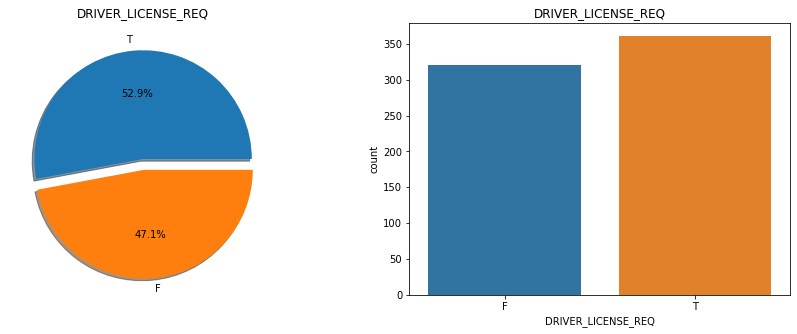

In [1009]:
f,ax=plt.subplots(1,2,figsize=(15,5))
df['DRIVER_LICENSE_REQ'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('DRIVER_LICENSE_REQ')
ax[0].set_ylabel('')
sns.countplot('DRIVER_LICENSE_REQ',data=df,ax=ax[1])
ax[1].set_title('DRIVER_LICENSE_REQ')
plt.show()

<AxesSubplot:title={'center':'max_salary'}, xlabel='max_salary', ylabel='Count'>

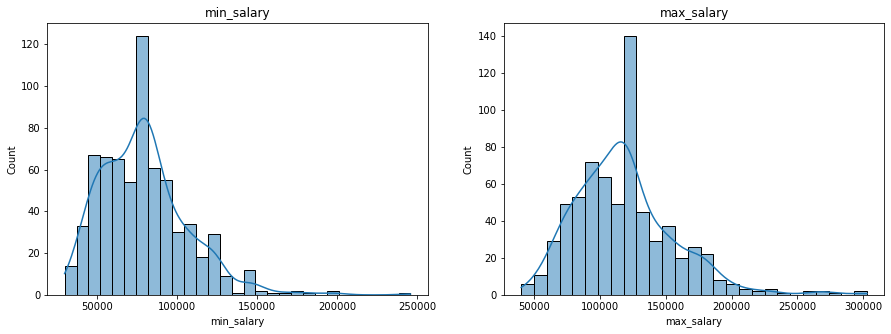

In [1010]:
f,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].set_title('min_salary')
sns.histplot(data=df, x="min_salary", kde=True,ax=ax[0])
ax[1].set_title('max_salary')
sns.histplot(data=df, x="max_salary", kde=True,ax=ax[1])

<AxesSubplot:xlabel='year_open_date', ylabel='count'>

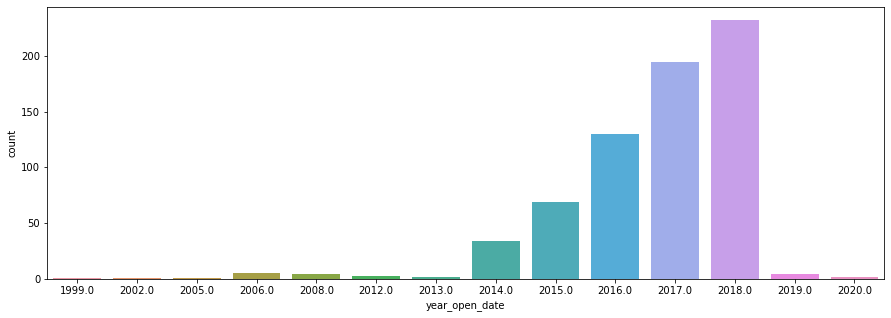

In [1011]:
f,ax=plt.subplots(figsize=(15,5))
sns.countplot(x=df["year_open_date"],ax=ax)

C:\Users\abdul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


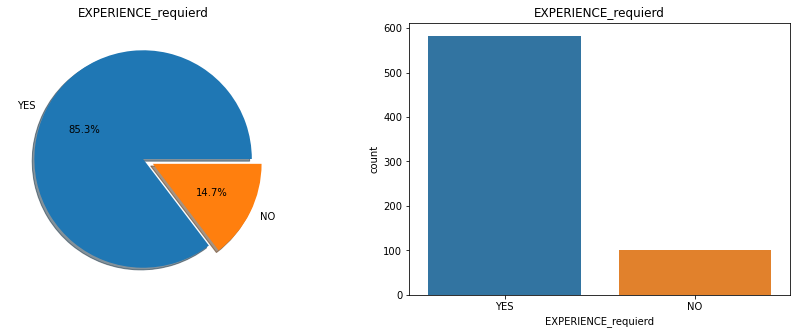

In [1012]:
f,ax=plt.subplots(1,2,figsize=(15,5))
df['EXPERIENCE_requierd'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('EXPERIENCE_requierd')
ax[0].set_ylabel('')
sns.countplot('EXPERIENCE_requierd',data=df,ax=ax[1])
ax[1].set_title('EXPERIENCE_requierd')
plt.show()

<AxesSubplot:xlabel='FULL_TIME_PART_TIME', ylabel='count'>

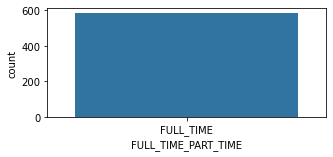

In [1013]:
f,ax=plt.subplots(figsize=(5,2))
sns.countplot(x=df["FULL_TIME_PART_TIME"],ax=ax)

In [1014]:
df[["Job_Class_Title","year_open_date"]].groupby('year_open_date', as_index=False).count().sort_values(by='year_open_date', ascending=False)

,year_open_date,Job_Class_Title
13,2020.0,2
12,2019.0,4
11,2018.0,232
10,2017.0,194
9,2016.0,130
8,2015.0,69
7,2014.0,34
6,2013.0,2
5,2012.0,3
4,2008.0,4


In [1015]:
df[["min_salary","max_salary","year_open_date"]].groupby('year_open_date', as_index=False).mean().sort_values(by='year_open_date', ascending=False)

,year_open_date,min_salary,max_salary
13,2020.0,89460.000000,123076.500000
12,2019.0,55681.250000,92477.000000
11,2018.0,79756.361969,122759.127087
10,2017.0,78026.216897,117729.477629
9,2016.0,80610.737505,119060.802373
8,2015.0,75114.057803,106854.438292
7,2014.0,85794.491074,116094.690372
6,2013.0,76995.000000,123243.500000
5,2012.0,67372.932559,104416.882808
4,2008.0,102301.224710,141671.706053


# <span style="color:orange">Task 2 start 
    
## <span style="color:brown">Q1:
A non-experienced job seeker wants to know what is the best job for him?

In [1016]:
df_q1=df[["Job_Class_Title","DRIVER_LICENSE_REQ","EDUCATION_YEARS","min_salary","max_salary","EXPERIENCE_requierd"]].copy()
df_q1["avg_salary"]=(df_q1["min_salary"]+df_q1["max_salary"])/2
df_q1=df_q1[df_q1["EXPERIENCE_requierd"]=="NO"]#choose jobe don't need experience
df_q1=df_q1.drop("EXPERIENCE_requierd",axis=1)
def education_requierd (t):
    if t == "four":
        return "T"
    else:
        return "F"
df_q1["EDUCATION_Required"]=df_q1["EDUCATION_YEARS"].apply(lambda x :education_requierd(x) )
df_q1=df_q1.drop(["EDUCATION_YEARS","min_salary","max_salary"],axis=1)
df_q1

,Job_Class_Title,DRIVER_LICENSE_REQ,avg_salary,EDUCATION_Required
1,ACCOUNTANT,T,65187.5,T
5,ADMINISTRATIVE CLERK,T,49631.5,F
7,ADVANCE PRACTICE PROVIDER CORRECTIONAL CARE REV,F,91704.5,F
13,AIRPORT GUIDE,T,39306.0,F
14,AIRPORT INFORMATION SPECIALIST,F,60760.0,F
...,...,...,...,...
657,WATER BIOLOGIST,T,88990.0,T
658,WATER MICROBIOLOGIST,T,88301.0,T
663,WATER TREATMENT OPERATOR,F,87184.0,F
669,WATER UTILITY WORKER,T,81170.5,F


C:\Users\abdul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'corr betweem DRIVER_LICENSE_REQ and EDUCATION_Required'}, xlabel='EDUCATION_Required', ylabel='avg_salary'>

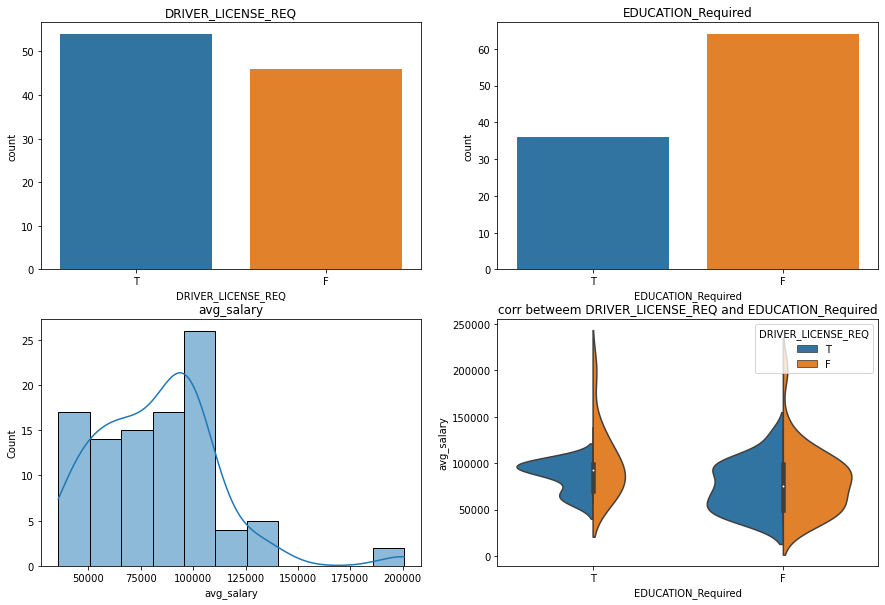

In [1017]:
f,ax=plt.subplots(2,2,figsize=(15,10))
ax[0,0].set_title('DRIVER_LICENSE_REQ')
sns.countplot(x=df_q1["DRIVER_LICENSE_REQ"],ax=ax[0,0])

ax[0,1].set_title('EDUCATION_Required')
sns.countplot(x=df_q1["EDUCATION_Required"],ax=ax[0,1])

ax[1,0].set_title('avg_salary')
sns.histplot(data=df_q1, x="avg_salary", kde=True,ax=ax[1,0])

ax[1,1].set_title('corr betweem DRIVER_LICENSE_REQ and EDUCATION_Required')
sns.violinplot("EDUCATION_Required","avg_salary", hue="DRIVER_LICENSE_REQ", data=df_q1,split=True,ax=ax[1,1])

In [1018]:
# both DRIVER_LICENSE_REQ and EDUCATION_Required
sol_1=df_q1[df_q1["DRIVER_LICENSE_REQ"]=="T"].copy()
sol_1=sol_1[sol_1["EDUCATION_Required"]=="T"]
sol_1=sol_1.sort_values(by=['avg_salary'], ascending=False)
sol_1=sol_1.drop(["DRIVER_LICENSE_REQ","EDUCATION_Required"],axis=1)
sol_1.head(2)

,Job_Class_Title,avg_salary
322,MATERIALS TESTING ENGINEERING ASSOCIATE,104117.5
220,ENGINEERING GEOLOGIST ASSOCIATE,101027.5


In [1019]:
# EDUCATION_Required but not reqired DRIVER_LICENSE_REQ
sol_2=df_q1[df_q1["DRIVER_LICENSE_REQ"]=="F"].copy()
sol_2=sol_2[sol_2["EDUCATION_Required"]=="T"]
sol_2=sol_2.sort_values(by=['avg_salary'], ascending=False)
sol_2=sol_2.drop(["DRIVER_LICENSE_REQ","EDUCATION_Required"],axis=1)
sol_2.head(2)

,Job_Class_Title,avg_salary
368,POLICE COMMANDER,199685.5
319,MARINE ENVIRONMENTAL MANAGER,137567.0


In [1020]:
# not required EDUCATION and not reqired DRIVER_LICENSE_REQ
sol_3=df_q1[df_q1["DRIVER_LICENSE_REQ"]=="F"].copy()
sol_3=sol_3[sol_3["EDUCATION_Required"]=="F"]
sol_3=sol_3.sort_values(by=['avg_salary'], ascending=False)
sol_3=sol_3.drop(["DRIVER_LICENSE_REQ","EDUCATION_Required"],axis=1)
sol_3.head(2)

,Job_Class_Title,avg_salary
382,PORT PILOT REV,200614.5
370,POLICE LIEUTENANT,136617.5


### Q1 :  
 - 1 - both DRIVER_LICENSE_REQ and EDUCATION_Required : (MATERIALS TESTING ENGINEERING ASSOCIATE)
 - 2 - EDUCATION_Required but not reqired DRIVER_LICENSE_REQ : ( POLICE COMMANDER )
 - 3 - not required EDUCATION and not reqired DRIVER_LICENSE_REQ : ( PORT PILOT REV )

# <span style="color:brown">Q2:

A concerned parents contacts you to tell them if there is a spicific school type that would guaranteed for their child a good future if you can tell, and which is it ?

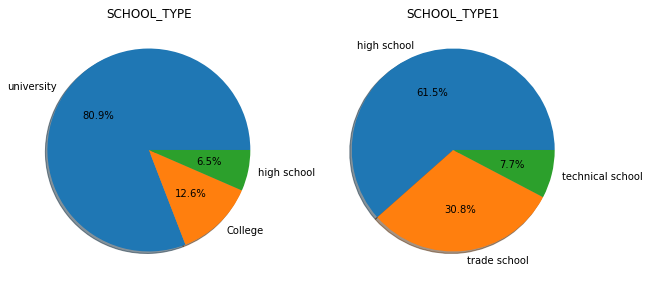

In [1021]:
sol2=df[["SCHOOL_TYPE","SCHOOL_TYPE1","min_salary","max_salary"]].copy()
sol2_0 = sol2[sol2.SCHOOL_TYPE != "no requierd"]
sol2_0 = sol2_0[sol2_0.SCHOOL_TYPE.notnull()]


sol2_0["SCHOOL_TYPE"]= sol2_0["SCHOOL_TYPE"].replace({'college or university':'university',
                                                          'college':'College',
                                                           'low fat':'Low Fat',
                                                            'high school':"high school",
                                                            'College':'College',
                                                            'Master':'university',
                                                              'graduate':'university',
                                                          'university':'university',
                                                          'degree program':'College',
                                                            'Bachelor':'university'})

sol2_1=sol2.dropna()
sol2_1=sol2_1.drop("SCHOOL_TYPE",axis=1)
def s2(s):
    s=s.replace("\n","")
    s=s.split() 
    z=" ".join(s[-2:])
    z=z.replace(",","")
               
    return z.strip()
sol2_1["SCHOOL_TYPE1"]=sol2_1["SCHOOL_TYPE1"].apply(lambda x:s2(x))
sol2_1["SCHOOL_TYPE1"]= sol2_1["SCHOOL_TYPE1"].replace({'with schools':'high school'})

f,ax=plt.subplots(1,2,figsize=(10,10))
sol2_0["SCHOOL_TYPE"].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('SCHOOL_TYPE')
ax[0].set_ylabel('')

sol2_1["SCHOOL_TYPE1"].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[1].set_title('SCHOOL_TYPE1')
ax[1].set_ylabel('')
plt.show()


C:\Users\abdul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'avg_salary'}>

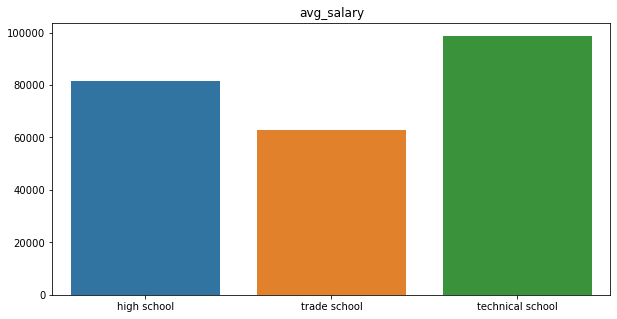

In [1022]:
#expected salary in the futuer
h_school=sol2_1[sol2_1["SCHOOL_TYPE1"]=="high school"]
min_avg_hs=h_school["min_salary"].sum()/len(h_school["min_salary"])
max_avg_hs=h_school["max_salary"].sum()/len(h_school["max_salary"])

trade_school=sol2_1[sol2_1["SCHOOL_TYPE1"]=="trade school"]
min_avg_trs=trade_school["min_salary"].sum()/len(trade_school["min_salary"])
max_avg_trs=trade_school["max_salary"].sum()/len(trade_school["max_salary"])

te_school=sol2_1[sol2_1["SCHOOL_TYPE1"]=="technical school"]
min_avg_tes=te_school["min_salary"].sum()/len(te_school["min_salary"])
max_avg_tes=te_school["max_salary"].sum()/len(te_school["max_salary"])

avg_hs=(min_avg_hs+max_avg_hs)/2
avg_trs=(min_avg_trs+max_avg_trs)/2
avg_tes=(min_avg_tes+max_avg_tes)/2

f,ax=plt.subplots(figsize=(10,5))
ax.set_title('avg_salary')
sns.barplot(["high school","trade school","technical school"], [avg_hs,avg_trs,avg_tes],ax=ax)

### Q2:I recommended you let your child join to technical school .for better chances for him\her let them continue their study (university\college)

# <span style="color:brown">Q3:

What the best time in the year to be ready for a job applying in any experience level?

In [1023]:
df_q3=df[["open_date","year_open_date","month_open_date"]].copy()
df_q3["month_open_date"]=df_q3["month_open_date"].astype("int")
df_q3["year_open_date"]=df_q3["year_open_date"].astype("int")
df_q3["week_open_date"]=pd.DatetimeIndex(df['open_date']).week
df_q3

C:\Users\abdul\AppData\Local\Temp\ipykernel_19944\2963143085.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df_q3["week_open_date"]=pd.DatetimeIndex(df['open_date']).week


,open_date,year_open_date,month_open_date,week_open_date
0,2014-04-18,2014,4,16
1,2018-06-22,2018,6,25
2,2018-07-13,2018,7,28
3,2018-07-27,2018,7,30
4,2018-06-01,2018,6,22
...,...,...,...,...
678,2014-04-11,2014,4,15
679,2016-01-29,2016,1,4
680,2016-04-08,2016,4,14
681,2018-09-14,2018,9,37


<AxesSubplot:xlabel='week_open_date', ylabel='count'>

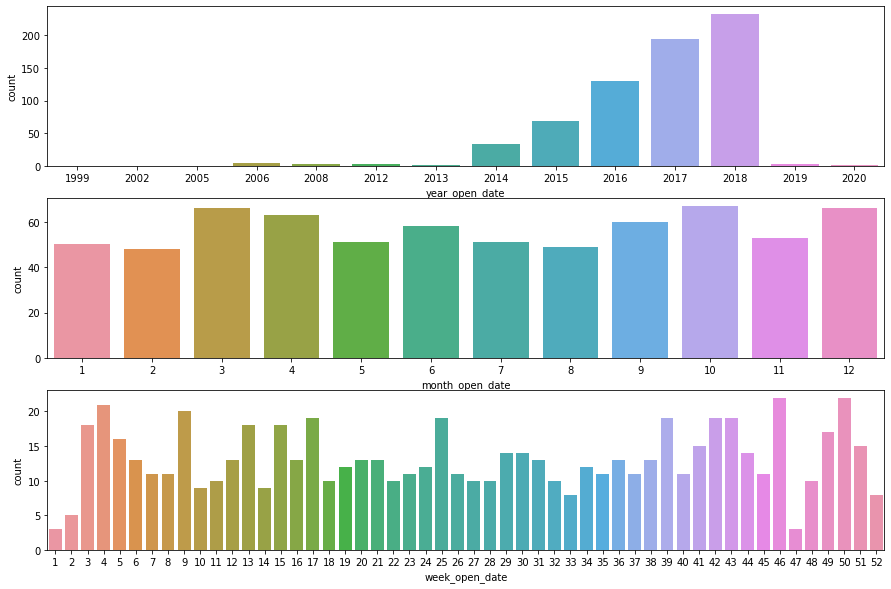

In [1024]:
f,ax=plt.subplots(3,1,figsize=(15,10))
sns.countplot(x=df_q3["year_open_date"],ax=ax[0])
sns.countplot(x=df_q3["month_open_date"],ax=ax[1])
sns.countplot(x=df_q3["week_open_date"],ax=ax[2])

###  Q3 : be ready everytime, but be sure you always ready in MARCH,APRIL,SEPTEMBER ,OCTOBER and DECEMBER you have better chance 

# <span style="color:brown">Q4:

Is experience more important than educational level?

In [1025]:
df_q4 = df[["EDUCATION_YEARS","EXPERIENCE_requierd","min_salary","max_salary"]].copy()
df_q4["avg_salary"]=(df_q4["min_salary"]+df_q4["max_salary"])/2
def education_requierd (t):
    if t == "four":
        return "T"
    else:
        return "F"
df_q4["EDUCATION_Required"]=df_q4["EDUCATION_YEARS"].apply(lambda x :education_requierd(x) )
df_q4=df_q4.drop(["EDUCATION_YEARS","min_salary","max_salary"],axis=1)
df_q4

,EXPERIENCE_requierd,avg_salary,EDUCATION_Required
0,YES,140344.5,F
1,NO,65187.5,T
2,YES,60311.5,F
3,YES,75293.0,F
4,YES,82475.5,T
...,...,...,...
678,YES,62253.0,F
679,NO,66419.0,F
680,YES,86506.0,T
681,YES,89251.0,T


In [1026]:
#salary with who just only have experience
sol1=df_q4[df_q4["EXPERIENCE_requierd"]=="YES"]
sol1=sol1[sol1["EDUCATION_Required"]=="F"]
T_EXP_F_EDU=sol1["avg_salary"].sum()/len(sol1["avg_salary"])
print(sol1.head())
print("the avr salary for who has experience without education = ", T_EXP_F_EDU)

  EXPERIENCE_requierd     avg_salary EDUCATION_Required
0                 YES  140344.500000                  F
2                 YES   60311.500000                  F
3                 YES   75293.000000                  F
6                 YES   67369.000000                  F
8                 YES   98691.861526                  F
the avr salary for who has experience without education =  98970.44014441069


In [1027]:
sol2=df_q4[df_q4["EXPERIENCE_requierd"]=="NO"]
sol2=sol2[sol2["EDUCATION_Required"]=="T"]
T_EDU_F_EXP=sol2["avg_salary"].sum()/len(sol2["avg_salary"])
print(sol2.head())
print("the avr salary for who get education but doesn't has experience = ",T_EDU_F_EXP)

   EXPERIENCE_requierd  avg_salary EDUCATION_Required
1                   NO     65187.5                  T
19                  NO     67233.5                  T
34                  NO     66220.5                  T
37                  NO     63203.0                  T
41                  NO     99023.0                  T
the avr salary for who get education but doesn't has experience =  91264.96837571403


In [1028]:
sol3 = df_q4[df_q4["EXPERIENCE_requierd"]=="YES"]
sol3=sol3[sol3["EDUCATION_Required"]=="T"]
T_EDU_T_EXP=sol3["avg_salary"].sum()/len(sol3["avg_salary"])
print("the avr salary for who get education and has experience = ",T_EDU_T_EXP)

the avr salary for who get education and has experience =  110085.84615384616


<AxesSubplot:title={'center':'avg_salary EDU and EXP'}, xlabel='avg_salary', ylabel='Count'>

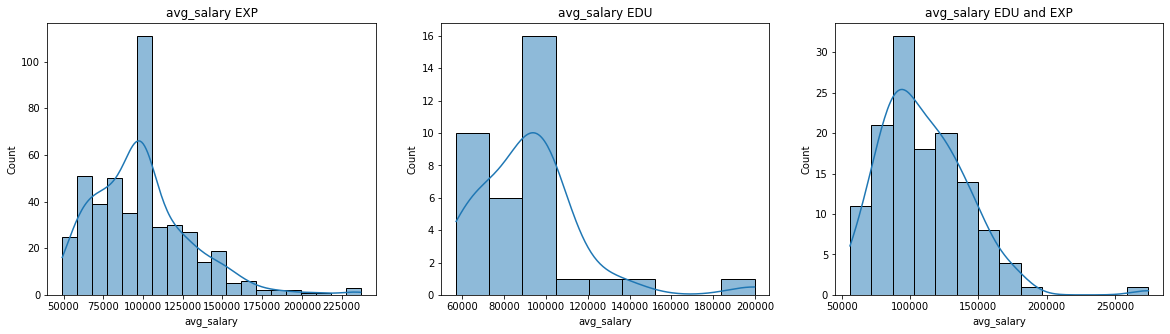

In [1029]:
f,ax=plt.subplots(1,3,figsize=(20,5))
ax[0].set_title('avg_salary EXP')
sns.histplot(data=sol1, x="avg_salary", kde=True,ax=ax[0])
ax[1].set_title('avg_salary EDU')
sns.histplot(data=sol2, x="avg_salary", kde=True,ax=ax[1])
ax[2].set_title('avg_salary EDU and EXP')
sns.histplot(data=sol3, x="avg_salary", kde=True,ax=ax[2])

### Q4 : if you have both EXP and EDU you have more chance th get better sallary but if you can't have them both the EXP have better chance to get better salary the EDU

# <span style="color:brown">Q5:

Which fresh grade job that will guarantee many job offers in the future for him?

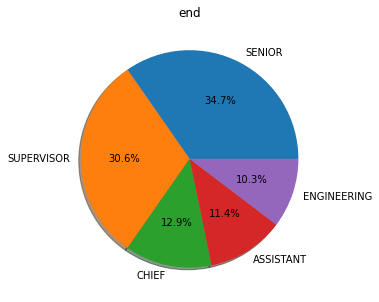

In [1030]:
sol5=df.copy()
sol5["Job_Class_Title"].value_counts()

def end_jt(j):
    j=j.upper()
    j=j.split()
    if j[0]=="RISK":
        return " ".join(j[0:2])
    elif "accounting".upper() in j:
        return "accounting".upper()
    elif ("ENGINEERING" or "ENGINEER") in j:
        return "ENGINEERING"
    elif ("SUPERVISOR" and "SENIOR") in j:
        return "SENIOR"
    elif "SUPERVISOR"  in j:
        return "SUPERVISOR"
    elif "CHIEF" in j:
        return "CHIEF"
    elif "ASSISTANT" in j:
        return "ASSISTANT"
    elif "MANAGER"in j:
        return "MANAGER"
    return j[0]

sol5["end"]=sol5["Job_Class_Title"].apply(lambda x: end_jt(x))
x=pd.DataFrame(sol5["end"])
x.head()
f,ax=plt.subplots(figsize=(5,5))
x["end"].value_counts()[:5].plot.pie(autopct='%1.1f%%',ax=ax,shadow=True)
ax.set_title('end')
ax.set_ylabel('')
plt.show()

### Q5) every employee must develop him self becouse, in the futuer he will find offers for SENIOR or he must work hard to achive SUPERVISOR position and they must study and take courses for ENGINERRING position

# <span style="color:brown">Q6:

"The City of Los Angeles does not discriminate on the basis of race, religion, national origin, sex, age, marital status, sexual orientation, gender identity, gender expression, disability, creed, color, ancestry, medical condition (cancer), or Acquired Immune Deficiency Syndrome.

AN EQUAL EMPLOYMENT OPPORTUNITY EMPLOYER 
"

The above statment is qouted from one of the job descriptions.

Based on the jobs requirments you structred above do you think that LA governate may bais a little for men over women or the applicant marital status for example may effect his chance to gain the job?
    

In [1031]:
#Masculine words
df_q6=df[["FileName","Content"]].copy()
def Masculine_Words(t):
    M_Wolrd={"strong","lead","independently","objectives","tackles","assert","assert","competence","decisions","driven","analysis","individual","individuals","competitive","principles","determined","force","independent","analyze"}
    l=[]
    for i in M_Wolrd:
        l.append(t.count(i))
    return sum(l)

def Feminine_Words(t):
    F_World={"support","share","responsible","together","committed","interpersonal","feel","connect","understanding","understand","emotional","cooperative","child","sharing","yield","supportive","interpersonal"}
    l=[]
    for i in F_World:
        l.append(t.count(i))
    return sum(l)

df_q6["M_counter"]=df_q6["Content"].apply(lambda x:Masculine_Words(x))
df_q6["F_counter"]=df_q6["Content"].apply(lambda x:Feminine_Words(x))

Male_hidden_message = df_q6["M_counter"].sum()
Female_hidden_message = df_q6["F_counter"].sum()

def male_female(num):
    if num>0:
        return "M"
    elif num<0:
        return "F"
    else:
        return "M/F"
df_q6["better_for"]=(df_q6["M_counter"]-df_q6["F_counter"]).apply(lambda x:male_female(x))

C:\Users\abdul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


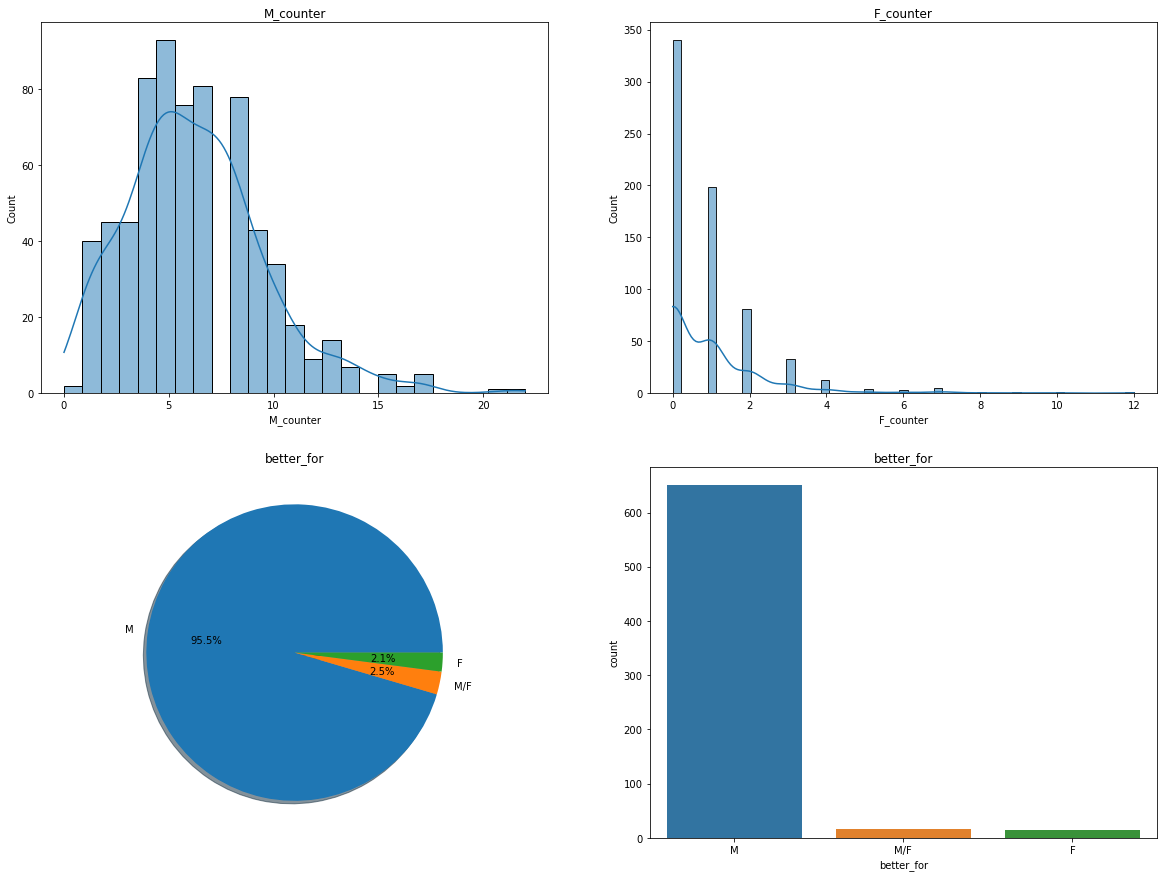

In [1032]:
f,ax=plt.subplots(2,2,figsize=(20,15))
ax[0,0].set_title('M_counter')
sns.histplot(data=df_q6, x="M_counter", kde=True,ax=ax[0,0])
ax[0,1].set_title('F_counter')
sns.histplot(data=df_q6, x="F_counter", kde=True,ax=ax[0,1])

df_q6["better_for"].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,0],shadow=True)
ax[1,0].set_title('better_for')
ax[1,0].set_ylabel('')
sns.countplot('better_for',data=df_q6,ax=ax[1,1])
ax[1,1].set_title('better_for')
plt.show()

### Q6) Based on the job applications that have been studied and with reference to the best statistics sites for male or female special words in job applications
### It turns out that these job applications are affected by gender and the social status of the applicant
### So that it turns out that these job applications are significantly biased towards males

### pleas check this website : 
- use this link male : https://blog.ongig.com/writing-job-descriptions/top-10-masculine-biased-words-in-job-descriptions/
- use this link female: https://blog.ongig.com/writing-job-descriptions/top-10-feminine-biased-words-in-job-descriptions/

In [1033]:
df["better_for"]=df_q6["better_for"]#to add this featuer to my DataFrame

# <span style="color:brown">Q7:

The city need an advice based on your analysis, build a new schools for more fresh non-experienced workers or encorge the work environment to help the workers to get promotions?

C:\Users\abdul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abdul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


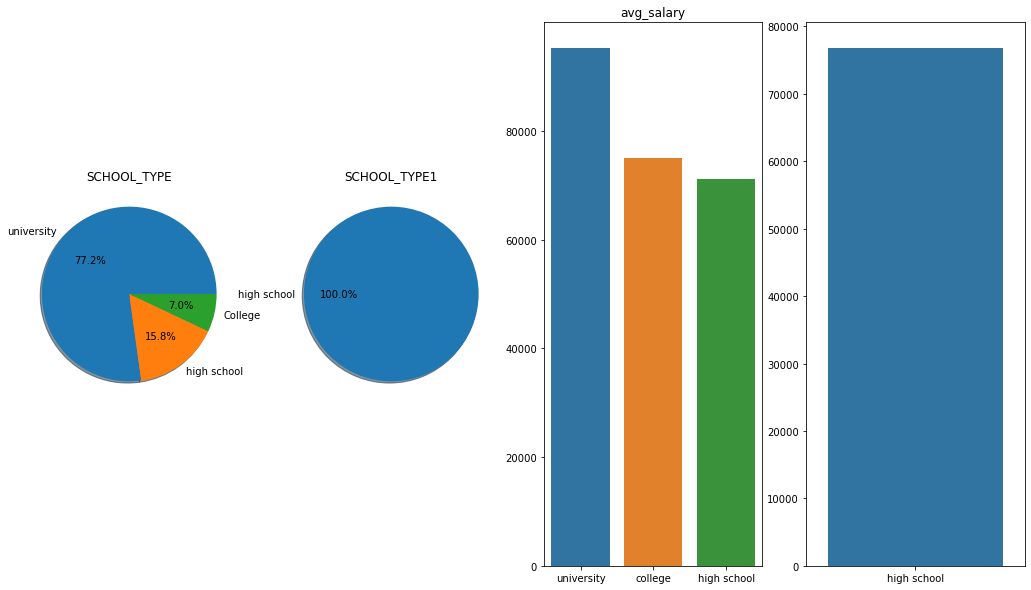

In [1034]:
sol7=df[["EXPERIENCE_requierd","SCHOOL_TYPE","SCHOOL_TYPE1","min_salary","max_salary"]].copy()

sol7_0 = sol7[sol7.SCHOOL_TYPE != "no requierd"]
sol7_0 = sol7_0[sol7_0.EXPERIENCE_requierd == "NO"]
sol7_0=sol7_0.drop("SCHOOL_TYPE1",axis=1)
sol7_0 = sol7_0[sol7_0.SCHOOL_TYPE.notnull()]


sol7_0["SCHOOL_TYPE"]= sol7_0["SCHOOL_TYPE"].replace({'college or university':'university',
                                                          'college':'College',
                                                           'low fat':'Low Fat',
                                                            'high school':"high school",
                                                            'College':'College',
                                                            'Master':'university',
                                                              'graduate':'university',
                                                          'university':'university',
                                                          'degree program':'College',
                                                            'Bachelor':'university'})

sol7_1=sol7.dropna()
sol7_1=sol7_1.drop("SCHOOL_TYPE",axis=1)
sol7_1 = sol7_1[sol7_1.EXPERIENCE_requierd == "NO"]
def s2(s):
    s=s.replace("\n","")
    s=s.split() 
    z=" ".join(s[-2:])
    z=z.replace(",","")
               
    return z.strip()
sol7_1["SCHOOL_TYPE1"]=sol7_1["SCHOOL_TYPE1"].apply(lambda x:s2(x))
sol7_1["SCHOOL_TYPE1"]= sol7_1["SCHOOL_TYPE1"].replace({'with schools':'high school'})

sol7_0["avg_salary"]=(sol7_0["min_salary"]+sol7_0["max_salary"])/2
sol7_1["avg_salary"]=(sol7_1["min_salary"]+sol7_1["max_salary"])/2

high_1=sol7_1[["avg_salary"]].sum()/len(sol7_1["avg_salary"])
high_1=float(high_1)


uni=sol7_0[sol7_0["SCHOOL_TYPE"]=="university"]
uni_salary=uni[["avg_salary"]].sum()/len(uni["avg_salary"])
uni_salary=float(uni_salary)

coll=sol7_0[sol7_0["SCHOOL_TYPE"]=="College"]
coll_salary=coll[["avg_salary"]].sum()/len(coll["avg_salary"])
coll_salary=float(coll_salary)

high=sol7_0[sol7_0["SCHOOL_TYPE"]=="high school"]
high_salary=high[["avg_salary"]].sum()/len(high["avg_salary"])
high_salary=float(high_salary)

f,ax=plt.subplots(1,4,figsize=(18,10))
sol7_0["SCHOOL_TYPE"].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('SCHOOL_TYPE')
ax[0].set_ylabel('')

sol7_1["SCHOOL_TYPE1"].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[1].set_title('SCHOOL_TYPE1')
ax[1].set_ylabel('')

ax[2].set_title('avg_salary')
#sns.barplot(["university","college","high school"],[uni_salary,coll_salary,high_salary] ,ax=ax[2])
sns.barplot(["university","college","high school"], [uni_salary,coll_salary,high_salary],ax=ax[2])
sns.barplot(["high school"], [high_1],ax=ax[3])

plt.show()



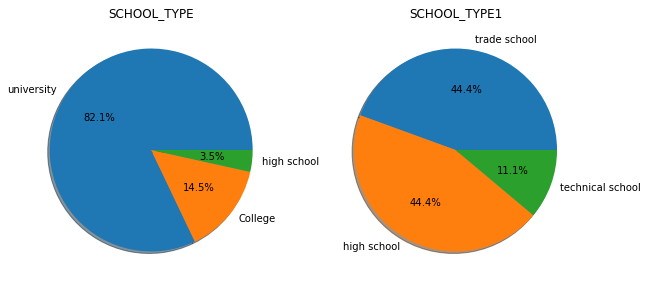

C:\Users\abdul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abdul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


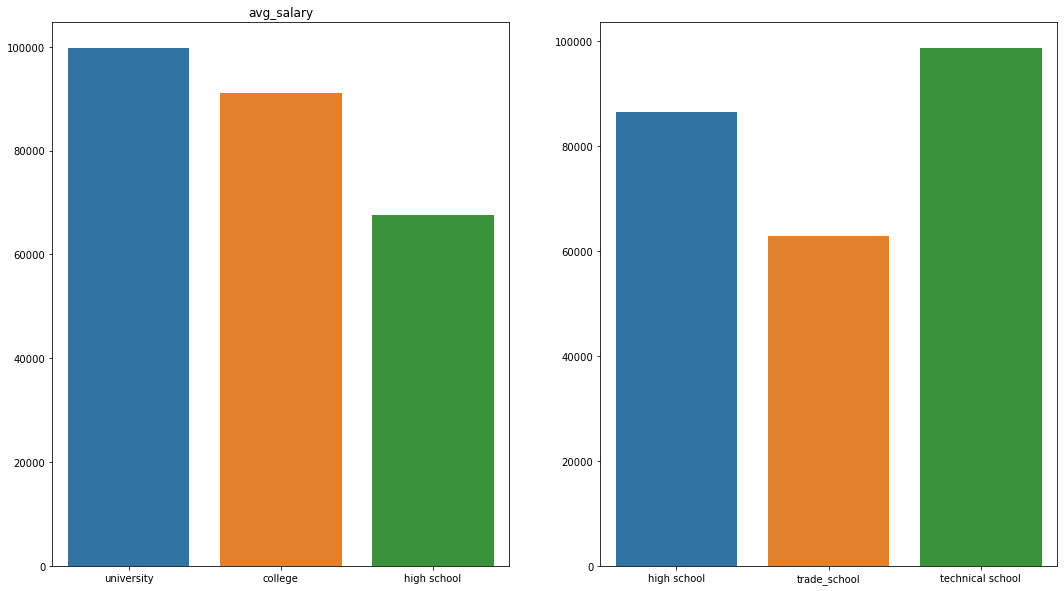

In [1035]:
sol7=df[["EXPERIENCE_requierd","SCHOOL_TYPE","SCHOOL_TYPE1","min_salary","max_salary"]].copy()

sol7_0 = sol7[sol7.SCHOOL_TYPE != "no requierd"]
sol7_0 = sol7_0[sol7_0.EXPERIENCE_requierd == "YES"]
sol7_0=sol7_0.drop("SCHOOL_TYPE1",axis=1)
sol7_0 = sol7_0[sol7_0.SCHOOL_TYPE.notnull()]


sol7_0["SCHOOL_TYPE"]= sol7_0["SCHOOL_TYPE"].replace({'college or university':'university',
                                                          'college':'College',
                                                           'low fat':'Low Fat',
                                                            'high school':"high school",
                                                            'College':'College',
                                                            'Master':'university',
                                                              'graduate':'university',
                                                          'university':'university',
                                                          'degree program':'College',
                                                            'Bachelor':'university'})

sol7_1=sol7.dropna()
sol7_1=sol7_1.drop("SCHOOL_TYPE",axis=1)
sol7_1 = sol7_1[sol7_1.EXPERIENCE_requierd == "YES"]
def s2(s):
    s=s.replace("\n","")
    s=s.split() 
    z=" ".join(s[-2:])
    z=z.replace(",","")
               
    return z.strip()
sol7_1["SCHOOL_TYPE1"]=sol7_1["SCHOOL_TYPE1"].apply(lambda x:s2(x))
sol7_1["SCHOOL_TYPE1"]= sol7_1["SCHOOL_TYPE1"].replace({'with schools':'high school'})

sol7_0["avg_salary"]=(sol7_0["min_salary"]+sol7_0["max_salary"])/2
sol7_1["avg_salary"]=(sol7_1["min_salary"]+sol7_1["max_salary"])/2

high_school=sol7_1[sol7_1["SCHOOL_TYPE1"]=="high school"]
high_1=high_school["avg_salary"].sum()/len(high_school["avg_salary"])
high_1=float(high_1)

trade_school=sol7_1[sol7_1["SCHOOL_TYPE1"]=="trade school"]
trade_1=trade_school["avg_salary"].sum()/len(trade_school["avg_salary"])
trade_1=float(trade_1)                                             

tec_school=sol7_1[sol7_1["SCHOOL_TYPE1"]=="technical school"]
tec_1=tec_school[["avg_salary"]].sum()/len(tec_school["avg_salary"])
tec_1=float(tec_1)

uni=sol7_0[sol7_0["SCHOOL_TYPE"]=="university"]
uni_salary=uni[["avg_salary"]].sum()/len(uni["avg_salary"])
uni_salary=float(uni_salary)

coll=sol7_0[sol7_0["SCHOOL_TYPE"]=="College"]
coll_salary=coll[["avg_salary"]].sum()/len(coll["avg_salary"])
coll_salary=float(coll_salary)

high=sol7_0[sol7_0["SCHOOL_TYPE"]=="high school"]
high_salary=high[["avg_salary"]].sum()/len(high["avg_salary"])
high_salary=float(high_salary)

f,ax=plt.subplots(1,2,figsize=(10,10))
sol7_0["SCHOOL_TYPE"].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('SCHOOL_TYPE')
ax[0].set_ylabel('')

sol7_1["SCHOOL_TYPE1"].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[1].set_title('SCHOOL_TYPE1')
ax[1].set_ylabel('')
plt.show()
           
f,ax=plt.subplots(1,2,figsize=(18,10))            
ax[0].set_title('avg_salary')
sns.barplot(["university","college","high school"], [uni_salary,coll_salary,high_salary],ax=ax[0])
sns.barplot(["high school","trade_school","technical school"], [high_1,trade_1,tec_1],ax=ax[1])

plt.show()




### Q7) i see the university worker with no EXPERIENCE have good salary and the worker who graduated from technical school with time will have better salary and the work which need experience in thchnical will offer more salary so from me you need more Technical school or Universty both of them will lead to better salary with experience . but if you focus on the school Technical school will be the best optione for you.

# <span style="color:brown">Q8:

What is the average salary for worker with a driver licence?

In [1036]:
df_q8 = df[["DRIVER_LICENSE_REQ","salary"]].copy()
df_q8 = df_q8[df_q8["DRIVER_LICENSE_REQ"]=="T"]
def av(l):
    s=0
    le=len(l)
    for i in l:
        s+=int(i)
    return s/le
df_q8["avg_list_of_slary"] = df_q8["salary"].apply(lambda x : av(x))
df_q8

,DRIVER_LICENSE_REQ,salary,avg_list_of_slary
1,T,"[49903, 72996, 55019, 80472]",64597.500000
4,T,"[60489, 88468, 71451, 104462]",81217.500000
5,T,"[37584, 54935, 43263, 53766, 49631, 61679]",50143.000000
6,T,"[54726, 80012]",67369.000000
13,T,"[31946, 44265, 31925, 46687]",38705.750000
...,...,...,...
677,T,"[56898, 83165, 76984, 95651]",78174.500000
678,T,"[51385, 63830, 58860, 73121]",61799.000000
679,T,"[52200, 76295, 55164, 80638, 56605, 70323]",65204.166667
680,T,"[78300, 94712]",86506.000000


<AxesSubplot:title={'center':'avg_salary EXP'}, xlabel='avg_list_of_slary', ylabel='Count'>

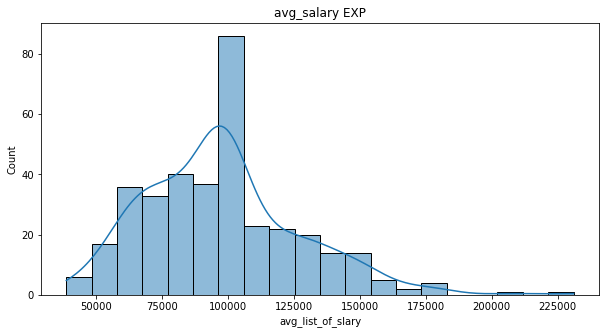

In [1037]:
f,ax=plt.subplots(figsize=(10,5))
ax.set_title('avg_salary EXP')
sns.histplot(data=df_q8, x="avg_list_of_slary", kde=True,ax=ax)

In [1038]:
ans=df_q8["avg_list_of_slary"].sum()/len(df_q8["avg_list_of_slary"])
ans

97334.66376907178

### Q8 : average salary for worker with a driver licence = $ 97334.66376907178 

# <span style="color:brown">Q9:

list the most feature that effect the salary of the worker.

<AxesSubplot:title={'center':'corr'}>

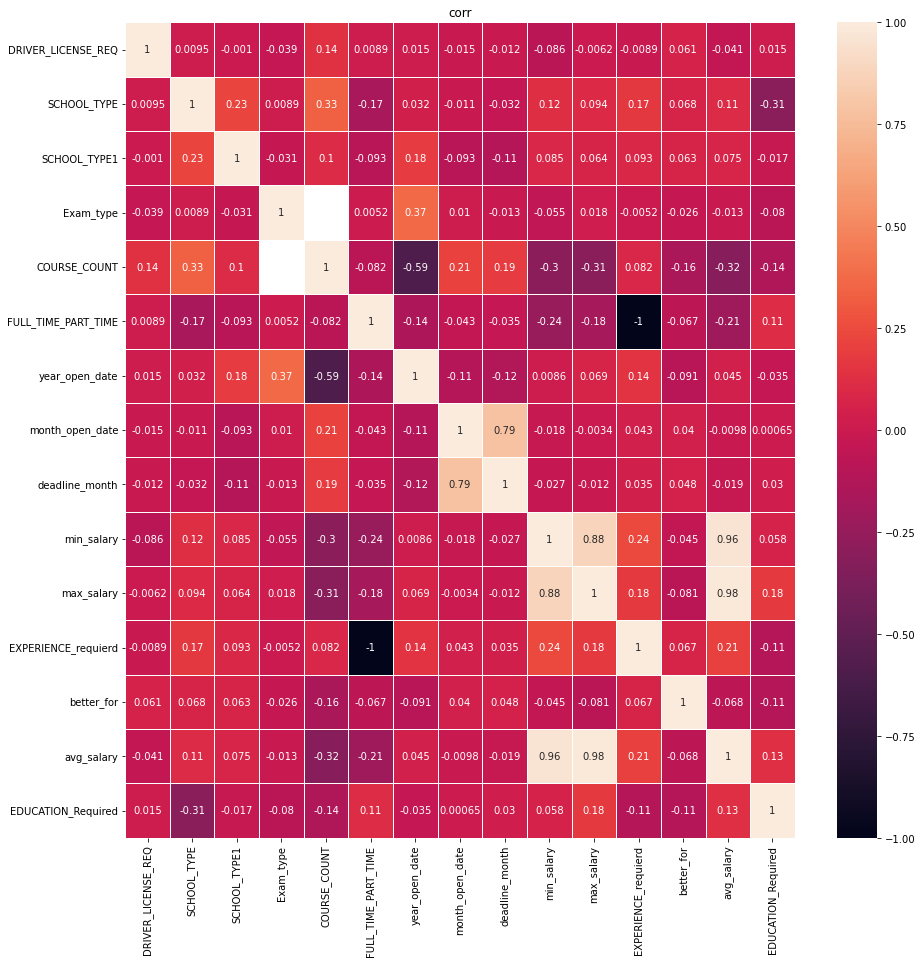

In [1040]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
le = LabelEncoder()
scaler = MinMaxScaler()
df["SCHOOL_TYPE"]= df["SCHOOL_TYPE"].replace({'college or university':'university',
                                                          'college':'College',
                                                           'low fat':'Low Fat',
                                                            'high school':"high school",
                                                            'College':'College',
                                                            'Master':'university',
                                                              'graduate':'university',
                                                          'university':'university',
                                                          'degree program':'College',
                                                            'Bachelor':'university',
                                                             'no requierd':np.nan})



def ed_yu(e):
    try:
        if e == "four":
            return 4
    except:
        return 0
    

def education_requierd (t):
    if t == "four":
        return "T"
    else:
        return "F"


def s2(s):
    try:
        s=s.replace("\n","")
        s=s.split() 
        z=" ".join(s[-2:])
        z=z.replace(",","")

        return z.strip()
    except:
        return np.nan
    

df["SCHOOL_TYPE1"]=df["SCHOOL_TYPE1"].apply(lambda x:s2(x))
df["SCHOOL_TYPE1"]= df["SCHOOL_TYPE1"].replace({'with schools':'high school'})
df["avg_salary"]=(df["min_salary"]+df["max_salary"])/2
df["EXPERIENCE_LENGTH"]=df["EXPERIENCE_LENGTH"].apply(lambda x: fix_exp_len(x))
df["EDUCATION_Required"]=df["EDUCATION_YEARS"].apply(lambda x :education_requierd(x) )



sol9 = df.copy()
sol9=sol9.drop(["FileName","Content","Job_Class_Number","DUTIES","requirement_set_text","Job_Class_Title","salary","open_date","APPLICATION_DEADLINE","EDUCATION_MAJOR","COURSE_SUBJECT(s)","EXP_JOB_CLASS_TITLE"],axis=1)

col = ['DRIVER_LICENSE_REQ','SCHOOL_TYPE','Exam_type','EDUCATION_Required','FULL_TIME_PART_TIME','EXPERIENCE_requierd',"better_for","SCHOOL_TYPE1"]

for i in col:
    sol9[i] = le.fit_transform(sol9[i])

f,ax=plt.subplots(figsize=(15,15))
ax.set_title('corr')
sns.heatmap(sol9.corr() ,linewidths=1,annot=True,cmap='rocket',ax=ax)



### Q9) with avg_salary the columns will be have impact are : ( school_type , full_time_part_time , min_salary,max_salary,experience_required , education_recquired )

In [1041]:
#df.to_csv("job1.csv") # save what i have for now

In [12]:
df = pd.read_csv("job1.csv")
df = df.drop("Unnamed: 0",axis=1)
df["APPLICATION_DEADLINE"]= pd.to_datetime(df['APPLICATION_DEADLINE'])
df["open_date"] = pd.to_datetime(df["open_date"])
df.head()

,FileName,Content,Job_Class_Title,Job_Class_Number,DUTIES,requirement_set_text,salary,DRIVER_LICENSE_REQ,open_date,APPLICATION_DEADLINE,...,FULL_TIME_PART_TIME,year_open_date,month_open_date,deadline_month,min_salary,max_salary,EXPERIENCE_requierd,better_for,avg_salary,EDUCATION_Required
0,311 DIRECTOR 9206 041814,311 DIRECTOR\nClass Code: 9206\nOpen Dat...,DIRECTOR,9206,A 311 Director is responsible for the successf...,1. One year of full-time paid experience as a ...,"['125175', '155514']",F,2014-04-18,2014-05-01 00:00:00,...,FULL_TIME,2014.0,4.0,5.0,125175.0,155514.0,YES,M,140344.5,F
1,ACCOUNTANT 1513 062218,ACCOUNTANT\n\nClass Code: 1513\nOpen Dat...,ACCOUNTANT,1513,An Accountant does professional accounting wor...,Graduation from an accredited four-year colleg...,"['49903', '72996', '55019', '80472']",T,2018-06-22,2018-07-22 10:29:06,...,NaN,2018.0,6.0,7.0,49903.0,80472.0,NO,M,65187.5,T
2,ACCOUNTING CLERK 1223 071318,ACCOUNTING CLERK\n\nClass Code: 1223\nOp...,ACCOUNTING CLERK,1223,An Accounting Clerk performs difficult and res...,Two years of full-time paid office clerical ex...,"['49005', '71618']",F,2018-07-13,2018-08-12 10:29:06,...,FULL_TIME,2018.0,7.0,8.0,49005.0,71618.0,YES,M,60311.5,F
3,ACCOUNTING RECORDS SUPERVISOR 1119 072718,ACCOUNTING RECORDS SUPERVISOR\n\nClass Code: ...,ACCOUNTING RECORDS SUPERVISOR,1119,"An Accounting Records Supervisor assigns, revi...",Two years of full-time paid experience as an A...,"['55332', '80930', '65145', '95254']",F,2018-07-27,2018-08-09 00:00:00,...,FULL_TIME,2018.0,7.0,8.0,55332.0,95254.0,YES,M,75293.0,F
4,ADMINISTRATIVE ANALYST 1590 060118,ADMINISTRATIVE ANALYST\n\nClass Code: 15...,ADMINISTRATIVE ANALYST,1590,An Administrative Analyst performs professiona...,1. One year of full-time paid professional exp...,"['60489', '88468', '71451', '104462']",T,2018-06-01,2018-06-14 00:00:00,...,FULL_TIME,2018.0,6.0,6.0,60489.0,104462.0,YES,M,82475.5,T


# <span style="color:brown">Q10:

Give a full statistical description for all numrical data columns including all insights and needed figures to visualize them.

In [13]:
def ed_yu(e):
    try:
        if e == "four":
            return 4
    except:
        return 0
    
def ex_le(e):
    try:
        e=e.split()
        return e[0]
    except:
        return np.nan
    
df["EDUCATION_YEARS"]=df["EDUCATION_YEARS"].apply(lambda x:ed_yu(x))
df["EXPERIENCE_LENGTH"]=df["EXPERIENCE_LENGTH"].apply(lambda x:ex_le(x))
df["EXPERIENCE_LENGTH"]=df["EXPERIENCE_LENGTH"].replace({'o':int("1"),
                                                        "t":int("2"),
                                                        "f":int("4"),
                                                        "s":int("6")})

def d_a(d):
    d=d.days
    if d<0 or d>150:
        return 30
    return d




df_num = df.select_dtypes(include=['number'])
df_num=df_num.drop("Job_Class_Number",axis=1)
df_num["day_to_apply"]=df["APPLICATION_DEADLINE"]-df["open_date"]
df_num["day_to_apply"]=df_num["day_to_apply"].apply(lambda x:d_a(x))
df_num.head()

,EDUCATION_YEARS,COURSE_COUNT,EXPERIENCE_LENGTH,year_open_date,month_open_date,deadline_month,min_salary,max_salary,avg_salary,day_to_apply
0,NaN,NaN,1.0,2014.0,4.0,5.0,125175.0,155514.0,140344.5,13
1,4.0,NaN,NaN,2018.0,6.0,7.0,49903.0,80472.0,65187.5,30
2,NaN,NaN,2.0,2018.0,7.0,8.0,49005.0,71618.0,60311.5,30
3,NaN,NaN,2.0,2018.0,7.0,8.0,55332.0,95254.0,75293.0,13
4,4.0,NaN,1.0,2018.0,6.0,6.0,60489.0,104462.0,82475.5,13


In [14]:
df_num.describe()

,EDUCATION_YEARS,COURSE_COUNT,EXPERIENCE_LENGTH,year_open_date,month_open_date,deadline_month,min_salary,max_salary,avg_salary,day_to_apply
count,166.0,19.000000,532.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,4.0,14.105263,2.355263,2016.585044,6.646628,6.749267,79072.898839,118310.824212,98691.861526,16.211144
std,0.0,18.633586,1.124840,1.950024,3.467880,3.436464,27561.649318,38203.058653,31913.675440,6.152444
min,4.0,1.000000,1.000000,1999.000000,1.000000,1.000000,29733.000000,40277.000000,35600.000000,13.000000
25%,4.0,1.500000,2.000000,2016.000000,4.000000,4.000000,58495.000000,92921.000000,76516.875000,13.000000
50%,4.0,4.000000,2.000000,2017.000000,7.000000,7.000000,79072.898839,118310.824212,98691.861526,13.000000
75%,4.0,22.000000,2.000000,2018.000000,10.000000,10.000000,91907.750000,136105.500000,115059.000000,13.000000
max,4.0,60.000000,6.000000,2020.000000,12.000000,12.000000,245758.000000,302864.000000,274311.000000,41.000000


C:\Users\abdul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abdul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abdul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

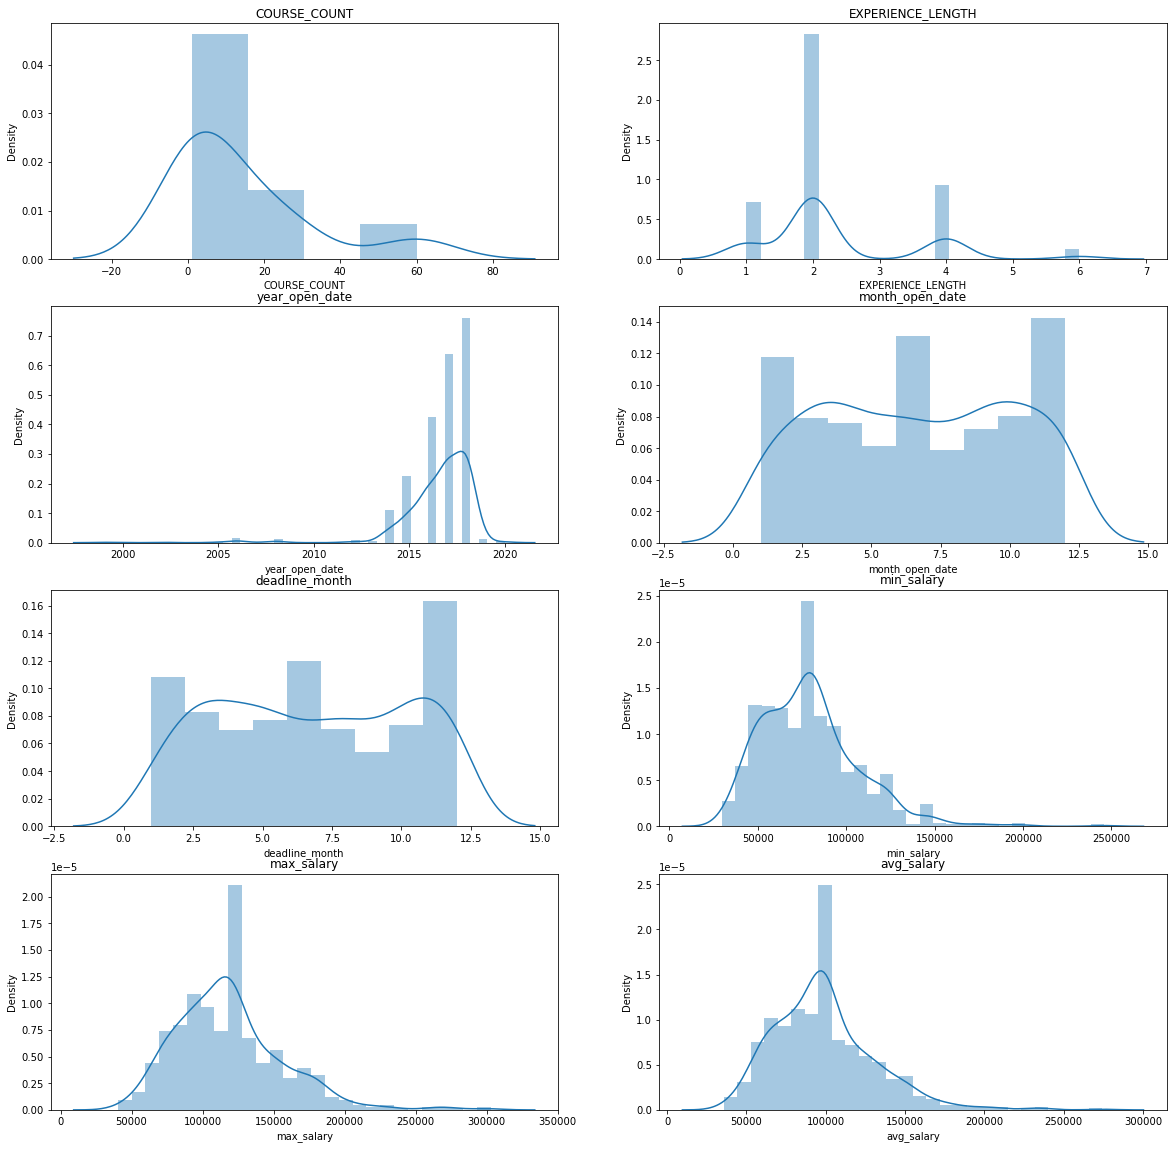

In [1069]:
f,ax=plt.subplots(4,2,figsize=(20,20))            
ax[0,0].set_title('COURSE_COUNT')
sns.distplot(df_num["COURSE_COUNT"],ax=ax[0,0])
ax[0,1].set_title('EXPERIENCE_LENGTH')
sns.distplot(df_num["EXPERIENCE_LENGTH"],ax=ax[0,1])
ax[1,0].set_title('year_open_date')
sns.distplot(df_num["year_open_date"],ax=ax[1,0])
ax[1,1].set_title('month_open_date')
sns.distplot(df_num["month_open_date"],ax=ax[1,1])
ax[2,0].set_title('deadline_month')
sns.distplot(df_num["deadline_month"],ax=ax[2,0])
ax[2,1].set_title('min_salary')
sns.distplot(df_num["min_salary"],ax=ax[2,1])
ax[3,0].set_title('max_salary')
sns.distplot(df_num["max_salary"],ax=ax[3,0])
ax[3,1].set_title('avg_salary')
sns.distplot(df_num["avg_salary"],ax=ax[3,1])
plt.show()

C:\Users\abdul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='day_to_apply', ylabel='Density'>

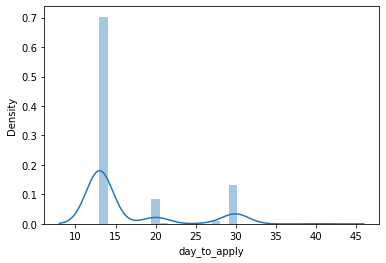

In [1106]:
sns.distplot(df_num["day_to_apply"])

### Q10) LA offering good jobs and salary . the average salary around 100K 
### most jobs require 2 years of experience but there is a lot of job not required any experience.
### some of these jobs required courses which must be taken ,some of this courses you can git from study in univesty 
### most jobs offers will be in first and last quarter of year so every one whom need this job must be ready to apply
### you must be fast and prepare everythings you may be asked for, the deadline time to apply in average 16 days

# <span style="color:brown">Q11:

Give a full statistical description for the categorical data columns that can be descriped including all insights and needed figures to visualize them.


In [151]:
df_date_object = df.select_dtypes(exclude=['number']).copy()
df_date_object=df_date_object.drop(["FileName","Content","DUTIES","requirement_set_text","salary","open_date","APPLICATION_DEADLINE","EXP_JOB_CLASS_TITLE"],axis=1)
df_date_object.head()

,Job_Class_Title,DRIVER_LICENSE_REQ,EDUCATION_MAJOR,SCHOOL_TYPE,SCHOOL_TYPE1,Exam_type,COURSE_LENGTH,COURSE_SUBJECT(s),FULL_TIME_PART_TIME,EXPERIENCE_requierd,better_for,EDUCATION_Required
0,DIRECTOR,F,NaN,university,NaN,Close,NaN,NaN,FULL_TIME,YES,M,F
1,ACCOUNTANT,T,NaN,university,NaN,Open,36Q|24S,NaN,NaN,NO,M,T
2,ACCOUNTING CLERK,F,NaN,university,trade school,Open,9Q|6S,NaN,FULL_TIME,YES,M,F
3,ACCOUNTING RECORDS SUPERVISOR,F,NaN,NaN,NaN,Open,NaN,NaN,FULL_TIME,YES,M,F
4,ADMINISTRATIVE ANALYST,T,NaN,university,NaN,Open,NaN,NaN,FULL_TIME,YES,M,T


In [152]:
z=df_date_object['SCHOOL_TYPE'].copy()
z=z.dropna()
z=pd.DataFrame(z)

z1=df_date_object['FULL_TIME_PART_TIME'].copy()
z1=z1.dropna()
z1=pd.DataFrame(z1)

z2=df_date_object['SCHOOL_TYPE1'].copy()
z2=z2.dropna()
z2=pd.DataFrame(z2)

def fix1(text):
    try:
        if text:
            return text.replace("|","_")
    except:
        return np.nan
def fix2(text):
    try:
        pattern= r"(.*?)_"
        s2 = re.findall(pattern,text)
        return s2[0]
    except:
        return np.nan

df_date_object['EDUCATION_MAJOR']=df_date_object['EDUCATION_MAJOR'].apply(lambda x:fix1(x))
df_date_object['EDUCATION_MAJOR']=df_date_object['EDUCATION_MAJOR'].apply(lambda x:fix2(x))

z3=df_date_object['EDUCATION_MAJOR'].copy()
z3=z3.dropna()
z3=pd.DataFrame(z3)

z4=df_date_object['COURSE_LENGTH'].copy()
z4=z4.dropna()
z4=pd.DataFrame(z4)

C:\Users\abdul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abdul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abdul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abdul\anaconda3\lib\si

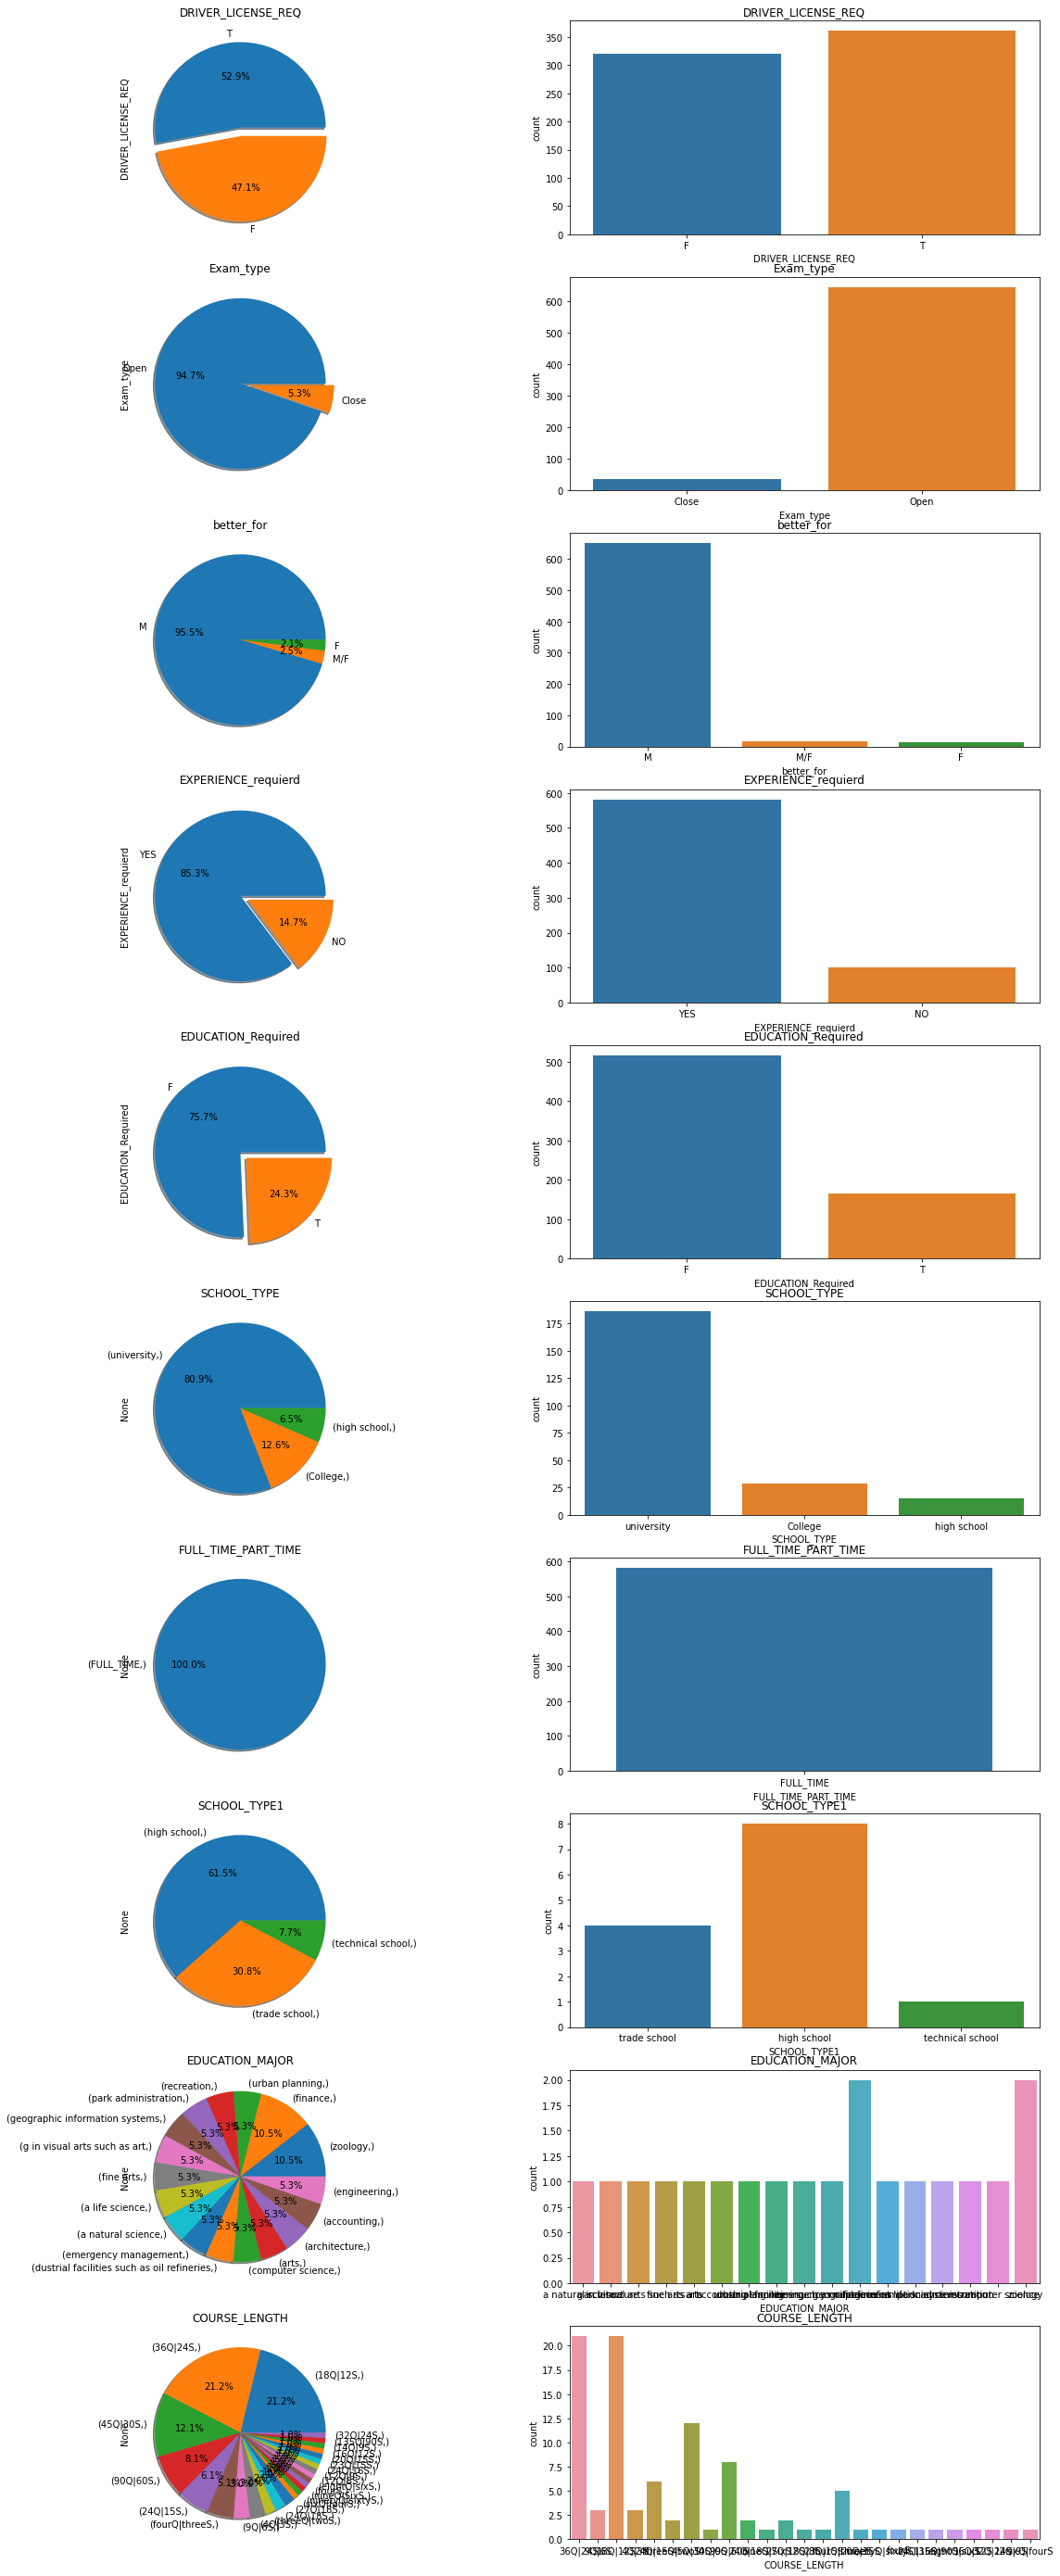

In [155]:
f,ax=plt.subplots(10,2,figsize=(20,50))

ax[0,0].set_title('DRIVER_LICENSE_REQ')
ax[0,0].set_ylabel('')
df_date_object['DRIVER_LICENSE_REQ'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0,0],shadow=True)
ax[0,1].set_title('DRIVER_LICENSE_REQ')
sns.countplot('DRIVER_LICENSE_REQ',data=df_date_object,ax=ax[0,1])

ax[1,0].set_title('Exam_type')
ax[1,0].set_ylabel('')
df_date_object['Exam_type'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1,0],shadow=True)
ax[1,1].set_title('Exam_type')
sns.countplot('Exam_type',data=df_date_object,ax=ax[1,1])


df_date_object["better_for"].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2,0],shadow=True)
ax[2,0].set_title('better_for')
ax[2,0].set_ylabel('')
ax[2,1].set_title('better_for')
sns.countplot('better_for',data=df_date_object,ax=ax[2,1])


ax[3,0].set_title('EXPERIENCE_requierd')
ax[3,0].set_ylabel('')
df_date_object['EXPERIENCE_requierd'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[3,0],shadow=True)
ax[3,1].set_title('EXPERIENCE_requierd')
sns.countplot('EXPERIENCE_requierd',data=df_date_object,ax=ax[3,1])

ax[4,0].set_title('EDUCATION_Required')
ax[4,0].set_ylabel('')
df_date_object['EDUCATION_Required'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[4,0],shadow=True)
ax[4,1].set_title('EDUCATION_Required')
sns.countplot('EDUCATION_Required',data=df_date_object,ax=ax[4,1])

ax[5,0].set_title('SCHOOL_TYPE')
ax[5,0].set_ylabel('')
z.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[5,0],shadow=True)
ax[5,1].set_title('SCHOOL_TYPE')
sns.countplot('SCHOOL_TYPE',data=z,ax=ax[5,1])

ax[6,0].set_title('FULL_TIME_PART_TIME')
ax[6,0].set_ylabel('')
z1.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[6,0],shadow=True)
ax[6,1].set_title('FULL_TIME_PART_TIME')
sns.countplot('FULL_TIME_PART_TIME',data=z1,ax=ax[6,1])

ax[7,0].set_title('SCHOOL_TYPE1')
ax[7,0].set_ylabel('')
z2.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[7,0],shadow=True)
ax[7,1].set_title('SCHOOL_TYPE1')
sns.countplot('SCHOOL_TYPE1',data=z2,ax=ax[7,1])


ax[8,0].set_title('EDUCATION_MAJOR')
ax[8,0].set_ylabel('')
z3.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[8,0],shadow=True)
ax[8,1].set_title('EDUCATION_MAJOR')
sns.countplot('EDUCATION_MAJOR',data=z3,ax=ax[8,1])

ax[9,0].set_title('COURSE_LENGTH')
ax[9,0].set_ylabel('')
z4.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[9,0],shadow=True)
ax[9,1].set_title('COURSE_LENGTH')
sns.countplot('COURSE_LENGTH',data=z4,ax=ax[9,1])
plt.show()

### Q11) most of these jobs required licnes.
### most of these jobs required exam .
### most of the jobs required men.
### educaition or experience of both of them reqired in most of jobs.
### these jobs required worker who finshed universty study .
### all jobs offers need employee for full time .
### most of these jobs need normal high scool .


# addition : build model to predict average salary

In [291]:
df_modul=df_num.copy()

In [292]:
result = pd.concat([df_modul, df_date_object], axis=1)

In [293]:
result.isnull().sum()

EDUCATION_YEARS        516
COURSE_COUNT           663
EXPERIENCE_LENGTH      150
year_open_date           0
month_open_date          0
deadline_month           0
min_salary               0
max_salary               0
avg_salary               0
day_to_apply             0
Job_Class_Title          0
DRIVER_LICENSE_REQ       0
EDUCATION_MAJOR        663
SCHOOL_TYPE            452
SCHOOL_TYPE1           669
Exam_type                0
COURSE_LENGTH          583
COURSE_SUBJECT(s)      645
FULL_TIME_PART_TIME    100
EXPERIENCE_requierd      0
better_for               0
EDUCATION_Required       0
dtype: int64

In [294]:
result=result.drop(['EDUCATION_YEARS',"EDUCATION_MAJOR",'SCHOOL_TYPE1',"COURSE_LENGTH","COURSE_SUBJECT(s)"],axis=1)

In [295]:
result["COURSE_COUNT"]=result["COURSE_COUNT"].fillna(0)

In [296]:
result["EXPERIENCE_LENGTH"]=result["EXPERIENCE_LENGTH"].fillna(0)

In [297]:
result["SCHOOL_TYPE"]=result["SCHOOL_TYPE"].fillna("university")

In [298]:
result["FULL_TIME_PART_TIME"]=result["FULL_TIME_PART_TIME"].fillna("Part_Time")

In [299]:
result.isnull().sum()

COURSE_COUNT           0
EXPERIENCE_LENGTH      0
year_open_date         0
month_open_date        0
deadline_month         0
min_salary             0
max_salary             0
avg_salary             0
day_to_apply           0
Job_Class_Title        0
DRIVER_LICENSE_REQ     0
SCHOOL_TYPE            0
Exam_type              0
FULL_TIME_PART_TIME    0
EXPERIENCE_requierd    0
better_for             0
EDUCATION_Required     0
dtype: int64

In [301]:
#result.to_csv("jobs2.csv")

In [302]:
df = pd.read_csv("jobs2.csv")
df = df.drop("Unnamed: 0",axis=1)
df.head()

,COURSE_COUNT,EXPERIENCE_LENGTH,year_open_date,month_open_date,deadline_month,min_salary,max_salary,avg_salary,day_to_apply,Job_Class_Title,DRIVER_LICENSE_REQ,SCHOOL_TYPE,Exam_type,FULL_TIME_PART_TIME,EXPERIENCE_requierd,better_for,EDUCATION_Required
0,0.0,1.0,2014.0,4.0,5.0,125175.0,155514.0,140344.5,13,DIRECTOR,F,university,Close,FULL_TIME,YES,M,F
1,0.0,0.0,2018.0,6.0,7.0,49903.0,80472.0,65187.5,30,ACCOUNTANT,T,university,Open,Part_Time,NO,M,T
2,0.0,2.0,2018.0,7.0,8.0,49005.0,71618.0,60311.5,30,ACCOUNTING CLERK,F,university,Open,FULL_TIME,YES,M,F
3,0.0,2.0,2018.0,7.0,8.0,55332.0,95254.0,75293.0,13,ACCOUNTING RECORDS SUPERVISOR,F,university,Open,FULL_TIME,YES,M,F
4,0.0,1.0,2018.0,6.0,6.0,60489.0,104462.0,82475.5,13,ADMINISTRATIVE ANALYST,T,university,Open,FULL_TIME,YES,M,T


In [318]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
leb = LabelEncoder()
scaler = MinMaxScaler()
li=["Job_Class_Title","DRIVER_LICENSE_REQ","SCHOOL_TYPE","Exam_type","FULL_TIME_PART_TIME","EXPERIENCE_requierd","better_for","EDUCATION_Required"]
for i in li:
    df[i]=leb.fit_transform(df[i])
    
columns = list(df.columns)
df[columns] = scaler.fit_transform(df[columns])

In [319]:
X = df.drop('avg_salary',axis=1)
Y = df['avg_salary']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33)

In [320]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score , r2_score
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train,Y_train)
num_valid = np.size(X_test, 0)
ypred = regressor.predict(X_test)

In [321]:
print(r2_score(Y_test,ypred))# to prediction avg_salary

0.985370959926182


In [322]:
df

,COURSE_COUNT,EXPERIENCE_LENGTH,year_open_date,month_open_date,deadline_month,min_salary,max_salary,avg_salary,day_to_apply,Job_Class_Title,DRIVER_LICENSE_REQ,SCHOOL_TYPE,Exam_type,FULL_TIME_PART_TIME,EXPERIENCE_requierd,better_for,EDUCATION_Required
0,0.0,0.166667,0.714286,0.272727,0.363636,0.441810,0.438853,0.438792,0.000000,0.251841,0.0,1.0,0.0,0.0,1.0,0.5,0.0
1,0.0,0.000000,0.904762,0.454545,0.545455,0.093369,0.153073,0.123947,0.607143,0.000000,1.0,1.0,1.0,1.0,0.0,0.5,1.0
2,0.0,0.333333,0.904762,0.545455,0.636364,0.089212,0.119355,0.103521,0.607143,0.001473,0.0,1.0,1.0,0.0,1.0,0.5,0.0
3,0.0,0.333333,0.904762,0.545455,0.636364,0.118500,0.209367,0.166281,0.000000,0.002946,0.0,1.0,1.0,0.0,1.0,0.5,0.0
4,0.0,0.166667,0.904762,0.454545,0.454545,0.142372,0.244433,0.196369,0.000000,0.004418,1.0,1.0,1.0,0.0,1.0,0.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,0.0,0.333333,0.714286,0.272727,0.272727,0.100229,0.125079,0.111654,0.000000,0.994109,1.0,1.0,0.0,0.0,1.0,0.5,0.0
678,0.0,0.000000,0.809524,0.000000,0.090909,0.104002,0.153705,0.129106,0.000000,0.995582,1.0,1.0,1.0,1.0,0.0,0.5,0.0
679,0.0,0.166667,0.809524,0.272727,0.272727,0.224821,0.207303,0.213254,0.000000,0.997054,1.0,1.0,1.0,0.0,1.0,0.5,1.0
680,0.0,0.166667,0.904762,0.727273,0.727273,0.129129,0.306934,0.224753,0.000000,0.998527,1.0,1.0,1.0,0.0,1.0,0.5,1.0
